# Twitter Data Science Project with Donald Trump and Joe Biden Tweets
### Udai Khattar, Sunil Sabnis, Chris Wang & Camden Wiseman

# Introduction

2020 has been a special and eventful year with historic events including the coronavirus pandemic and the U.S Presidential Election. Unsurprisingly, the two presidential candidates, Donald Trump and Joe Biden, have utilized Twitter as an avenue to increase their publicity, connect with supporters, and reach out to potential voters. We are interested in investigating and comparing the similarities and differences between their Twitter activity, both in the context of the election and more broadly in the past year. This has significant implications as political parties, candidates, and celebrities have increasingly placed more effort into growing their social media accounts in hopes of maintaining and strengthening their public image and support. Thus, a question that arises is: how does one's online activity influence his or her so-called popularity or the level of engagement online? Moreover, what, if any, are the attributes of successful social media strategies?

Our research question, aiming to answer the above questions, is: how does the Twitter activity of Biden and Trump differ? We approach activity through two components: the candidates' decisions in posting (time of day, posts in a day, length of tweets, sentiment) and users' interactions with the posts (number of favourites and retweets). Overall, we found that while candidates shared certain decisions (posts in a day increased by similar proportions as election nears), they also differed in other decisions including sentiment, where Trump's posts are found to be more subjective and polarized, and length of tweets, where Trump's tweets are significantly shorter than Biden's by more than two times. These findings provide insights on the success of the Biden and Trump campaigns leading up to the election.

# Data Description

The data collection idea was inspired by a data analysis project by Eric Bruin posted on Kaggle that compared tweets between Donald Trump and Hilary Clinton in 2016 (Bruin). Similar to Bruin, we are interested in looking at “real social media data” and looking for relationships within the data. Bruin wrote a script in R to extract tweets from each account. We developed a similar approach to mine the tweets. First, we had to sign up for a Twitter Developer account in order to gain access to Twitter API keys. Once our applications were approved, we installed the Tweepy package. The Tweepy package allowed us to call the Twitter API functions within a Jupyter notebook using Python. From there, we developed our own script that was able to extract tweets from a given user. We collected 3083 tweets from Joe Biden and 1661 tweets from Donald Trump. Unfortunately when mining Trump’s account, the API stalled once it reached ~1600 tweets. The script created an array of tweets. Then using the pandas dataframe, we wrote a CSV file that contained all the data. Each observation represents a tweet; during the collection phase we specifically filtered out retweets so that the dataset would only contain tweets generated by Biden or Trump. Each tweet has an id, full text, entities (ex: hashtags), created at date, number of favorites (likes), number of retweets, language, geolocation (if available), and an in reply attribute (indicates if a tweet was in response to another account). The Twitter API allows for a maximum collection of 3200 tweets. For Joe Biden his tweets date back to almost a year ago, while Trump’s tweets only go back to July. This is reasonable because Trump is more active on Twitter and we could not collect as many of Trump's tweets.  The raw data source is provided in the CSV files that are part of our github repository (see the Biden and Trump tweets CSV files).

Once we had collected the tweets, we created new columns that would later be used in our analyses. We created a date column by converting the created_at column into a date-time object column, which would allow us to perform calculations using a time scale. The time_of_day column was created to classify if a tweet was posted during the morning (5am - 12pm), afternoon (12 pm to 5pm), evening (5pm to 10pm), or night (11pm to 5am). The hour column reflects the hour of day, the tweet was posted at. The tweet_length column reflects the word count of the tweet. The days_to_election column represents the amount of day to the election from the date that tweet was posted at. See the datacleaning file we included if you are interested in how we cleaned the data and added these columns.


#### see appendix section for a data description presented in Q&A format based on the Gebru et al. paper (see Acknowledgements section) 

# Limitations

As discussed in the data description section, the biggest limitation we faced was having a limit of ~3200 tweets from a Twitter account. This is a rule of the Twitter API, which can be bypassed by paying for premium APIs. Even without the premium API, each tweet object (Tweepy Status object) contained all the information we wanted for performing analyses to answer our research question. 

Another general limitation we had is that given the complex nature of tweets, confounding between variables is inevitable. This means that it is difficult to see definitively if any one variable led to more likes and retweets, since other variables (such as length of tweet, sentiment) could have influenced the results. In general, we compared the activities of each candidate without necessarily making a conclusion as to how they are associated with more likes or retweets.

Lastly, while Biden's tweets are from throughout the past year, Trump's tweets are from July to October 2020. This difference may decrease the accuracy of our comparisons of key attributes (number of likes, number of retweets, sentiments, etc).

# Pre-registration

First, we would perform a cluster analysis plotting time of day against number of likes, in order to find out if posting at a certain time is associated with more likes. This would enable us to find out if posting at a certain time is more advantageous for a candidate, and whether or not candidates recognized and utilized this to their advantage. However, we recognize the limitation that voters' interactions on Twitter may not be generalized to general social media use.

Next, we would compare Trump and Biden's Twitter activities as election nears, plotting various variables against time. These variables include frequency of tweets, number of likes, number of retweets, and number of words in each twet. This would enable us to see whether and how the candidates' activities and popularity changed over time.

Lastly, we aim to perform a sentiment analysis of each candidates' tweets. We will first extract the most popular words from Biden's and Trump's tweets and use logistic regression to predict number of likes using keyword. We aim to determine if the usage of certain keywords is associated with more likes. Then, we will sentiment-code the keywords and compare the two candidates' overall sentiments of Tweets. This would reveal important characteristics of the candidates' Twitter activity that we otherwise could not obtain through summary statistics and regression analysis alone.

# Data Import and Preparations

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
import nltk
#!pip install seaborn
import seaborn as sns
from datetime import date
from string import punctuation
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
#!pip install textblob
from textblob import TextBlob

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/sunil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/sunil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Importing Biden and Trump tweet data into a dataframe, we print the top-5 rows of each column. The "bidenbyday" and "trumpbyday" data frames are grouped by day. 

In [53]:
biden = pd.read_csv("biden_updated.csv", index_col = 0)
trump = pd.read_csv("trump_updated.csv", index_col = 0)

bidenbyday = pd.read_csv("bidenbyday.csv", index_col = 0)
trumpbyday = pd.read_csv("trumpbyday.csv", index_col = 0)

In [54]:
biden.head()

,id,full_text,entities,created_at,favourite,retweets,language,geo,in_reply,date,time_of_day,tweet_length,hour,day_or_night,days_to_election
0,1313663334286323714,Please. https://t.co/acHR1Rf8hE,"{'hashtags': [], 'symbols': [], 'user_mentions...",2020-10-07 02:12:00,90289,14867,en,NaN,NaN,2020-10-07 02:12:00,night,2,2,1,27
1,1313652765319557122,I can’t wait for @KamalaHarris to make history...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2020-10-07 01:30:00,13317,2126,en,NaN,NaN,2020-10-07 01:30:00,night,30,1,1,27
2,1313646473393840128,"Ignore the polls, folks. There’s too much at s...","{'hashtags': [], 'symbols': [], 'user_mentions...",2020-10-07 01:05:00,56278,12104,en,NaN,NaN,2020-10-07 01:05:00,night,28,1,1,27
3,1313641691602202624,Think about what it takes for a Black person t...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2020-10-07 00:46:00,30592,6574,en,NaN,NaN,2020-10-07 00:46:00,night,30,0,1,27
4,1313633890289045504,"Look, folks, I'm going to be honest: we'll try...","{'hashtags': [], 'symbols': [], 'user_mentions...",2020-10-07 00:15:00,13490,3023,en,NaN,NaN,2020-10-07 00:15:00,night,43,0,1,27


In [55]:
trump.head()

,id,full_text,entities,created_at,favourite,retweets,language,geo,in_reply,date,time_of_day,tweet_length,hour,day_or_night,days_to_election
0,1314035056441257985,https://t.co/wHQx2qd8q2,"{'hashtags': [], 'symbols': [], 'user_mentions...",2020-10-08 02:49:05,7856,2700,und,NaN,NaN,2020-10-08 02:49:05,night,1,2,1,26
1,1314033009293656065,"2010 to 2016 under Kamala Harris's watch as ""T...","{'hashtags': [], 'symbols': [], 'user_mentions...",2020-10-08 02:40:57,22294,8828,en,NaN,NaN,2020-10-08 02:40:57,night,12,1,1,26
2,1314028978806624256,https://t.co/4Wv5cCFEns https://t.co/kMvBv6Pu9I,"{'hashtags': [], 'symbols': [], 'user_mentions...",2020-10-08 02:24:56,18191,5547,und,NaN,NaN,2020-10-08 02:24:56,night,2,1,1,26
3,1314028699084259329,https://t.co/rxqPqR4uqZ,"{'hashtags': [], 'symbols': [], 'user_mentions...",2020-10-08 02:23:49,37800,9667,und,NaN,NaN,2020-10-08 02:23:49,night,1,0,1,26
4,1314027975185182721,https://t.co/xGevgI2wTO,"{'hashtags': [], 'symbols': [], 'user_mentions...",2020-10-08 02:20:57,24724,7687,und,NaN,NaN,2020-10-08 02:20:57,night,1,0,1,26


#### We have to convert to columns datetime here because conversion to CSV file converts column with datetime type to string

In [56]:
biden['date'] = pd.to_datetime(biden["date"])
trump['date'] = pd.to_datetime(trump["date"])
bidenbyday['unique_dates'] = pd.to_datetime(bidenbyday['unique_dates']).dt.date
trumpbyday['unique_dates'] = pd.to_datetime(trumpbyday['unique_dates']).dt.date

# Exploratory Data Analysis

#### We first compute summary statistics for the "full_text", "favourite", and "retweet" columns.

In [57]:
# Get summary statistics 
def tweet_length (x):
    return len(x.split())

def summ_stat(x, names):
    total_words = 0
    word_counts_list = []
    
    for tweet in x["full_text"]:
        next_tweet_length = tweet_length(tweet)
        word_counts_list.append(next_tweet_length)                 
        total_words += next_tweet_length
    # word count summ stats 
    print(names + " words tweeted: " + "{:.0f}".format(total_words))
    mean_wordcount = np.mean(word_counts_list)
    print("Mean number of words in " + names + " tweets: " + "{:.2f}".format(mean_wordcount))
    median_wordcount = np.median(word_counts_list)
    print("Median number of words in " + names + ": " + "{:.2f}".format(median_wordcount))
    mode_wordcount = statistics.mode(word_counts_list)
    print("Mode number of words in " + names + " tweets: " + "{:.0f}".format(mode_wordcount))
    minimum_words = min(word_counts_list)
    print("The least number of words " + names + " used in a tweet was: " + "{:.0f}".format(minimum_words))
    maximum_words = max(word_counts_list)
    print("The most number of words " + names + " used in a tweet was: " + "{:.0f}".format(maximum_words))
    stddev_wordcount = np.std(word_counts_list)
    print("Standard deviation of number of words in " + names + " tweets: " + "{:.2f}".format(stddev_wordcount))
    
    # favorites stats 
    total_favorites = x["favourite"].sum()
    print("\n"+names + " total tweet favorites count: " + "{:.0f}".format(total_favorites))
    mean_favorites = x['favourite'].mean()
    print("Mean number of favorites for " + names + " tweets: " + "{:.2f}".format(mean_favorites))
    median_favorites = x['favourite'].median()
    print("Median number of favorites for " + names + " tweets: " + "{:.2f}".format(median_favorites))
    # mode not useful because of wide range of favourite values 
    minimum_favorites = x['favourite'].min()
    print("The least number of favorites a " + names + " tweet received was: " + "{:.0f}".format(minimum_favorites))
    maximum_favorites = x['favourite'].max()
    print("The most number of favorites a " + names + " tweet received was: " + "{:.0f}".format(maximum_favorites))
    stddev_favorites = x['favourite'].std()
    print("Standard deviation of number of favorites for " + names + " tweets: " + "{:.2f}".format(stddev_favorites))
    
    # retweet stats 
    total_retweets = x["retweets"].sum()
    print("\n"+names + " retweets: " + "{:.0f}".format(total_retweets))
    mean_retweets = x['retweets'].mean()
    print("Mean number of retweets for " + names + " tweets: " + "{:.2f}".format(mean_retweets))
    median_retweets = x['retweets'].median()
    print("Median number of retweets for " + names + " tweets: " + "{:.2f}".format(median_retweets))
    minimum_retweets = x['retweets'].min()
    print("The least number of retweets a " + names + " tweet received was: " + "{:.0f}".format(minimum_retweets))
    maximum_retweets = x['retweets'].max()
    print("The most number of retweets a " + names + " tweet received was: " + "{:.0f}".format(maximum_retweets))
    stddev_retweets = x['retweets'].std()
    print("Standard deviation of number of retweets for each " + names + " tweet: " + "{:.2f}".format(stddev_retweets))
    
    # lang stats 
    language_counts = x["language"].value_counts()
    print("Raw number of " + names + " tweets in each language: " + "\n" + str(language_counts))
    
summ_stat(biden, 'Biden')
print('\n')
summ_stat(trump, 'Trump')

# trump[trump["favourite"] == 0] 

Biden words tweeted: 100838
Mean number of words in Biden tweets: 32.70
Median number of words in Biden: 35.00
Mode number of words in Biden tweets: 43
The least number of words Biden used in a tweet was: 1
The most number of words Biden used in a tweet was: 59
Standard deviation of number of words in Biden tweets: 12.75

Biden total tweet favorites count: 146530712
Mean number of favorites for Biden tweets: 47513.20
Median number of favorites for Biden tweets: 19678.50
The least number of favorites a Biden tweet received was: 34
The most number of favorites a Biden tweet received was: 1890801
Standard deviation of number of favorites for Biden tweets: 92519.77

Biden retweets: 27712385
Mean number of retweets for Biden tweets: 8985.86
Median number of retweets for Biden tweets: 4409.00
The least number of retweets a Biden tweet received was: 11
The most number of retweets a Biden tweet received was: 327830
Standard deviation of number of retweets for each Biden tweet: 15353.01
Raw num

#### As shown above, it is worth noting that mean and median number of both favourites and retweets are greater in Trump's tweets than Biden's tweets. Moreover, Trump's tweets are much shorter than Biden's with an average of 20.57 compared to 32.7. These distributions will be more clearly shown in side-by-side histograms and boxplots subsequently. The summary statistics also show another limitation of our data; Trump's lowest favourite and retweets values are 0, which is unrealistic. There are only five observations when favourite and retweet counts of Trump equal 0. This shows, however, that the API or Tweepy package could have errored when collecting the data.

#### Next, we compare histograms plotting Biden's and Trump's tweets in order to see how their Twitter activities differ from one another in length, time, and sentiment, as well as how well-received their tweets are.

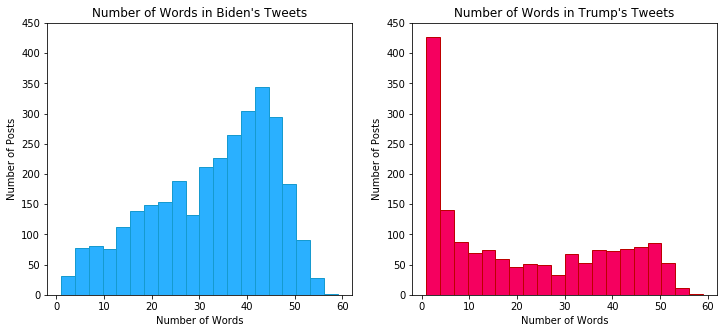

In [58]:
# Number of words

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(biden['tweet_length'], facecolor = '#2ab0ff', edgecolor='#169acf', bins = 20)
ax1.set_title("Number of Words in Biden's Tweets")
ax1.set_xlabel("Number of Words")
ax1.set_ylabel("Number of Posts")
ax1.set_ylim(0,450)

ax2.hist(trump['tweet_length'], facecolor = "#f5005f", edgecolor='#bd0000', bins = 20)
ax2.set_title("Number of Words in Trump's Tweets")
ax2.set_xlabel("Number of Words")
ax2.set_ylabel("Number of Posts")
ax2.set_ylim(0,450)

plt.show()

#### As seen in the side-by-side histograms above comparing the number of words in Biden's and Trump's tweets, Biden's distribution clearly has a higher median with a tail to the left. On the contrary, Trump's distribution exhibits a smaller median with a tail to the right. This signifies that on average, Biden posts longer tweets whereas a majority of Trump's tweets are short (0-5 words had an abnormally high distribution compared to other categories).

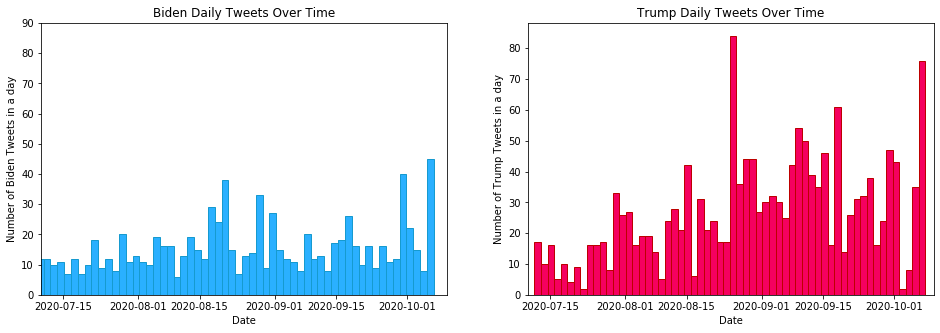

In [59]:
# Tweets per day

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
ax1.hist(biden.date, facecolor = '#2ab0ff', edgecolor='#169acf', bins = 230)
ax1.set_xlim([date(2020, 7, 10), date(2020, 10, 10)])
ax1.set_ylim(0,90)
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Biden Tweets in a day')
ax1.set_title("Biden Daily Tweets Over Time")

ax2.hist(trump['date'], facecolor = "#f5005f", edgecolor='#bd0000', bins = 60)
ax2.set_xlabel('Date')
ax2.set_ylabel('Number of Trump Tweets in a day')
ax2.set_title("Trump Daily Tweets Over Time")
ax2.set_xlim([date(2020, 7, 10), date(2020, 10, 10)])
ax1.set_ylim(0,90)

plt.show()

#### As seen above, Biden and Trump both posted more as election nears. However, this is lcearer in trump's plot, where Trump averaged at less than 20 posts a day in mid-July and more than 30 since September. Biden's distribution, in comparison, is more uniform – while there is a noticeable increase as time passes, the overall average remained approximately the same with increased upper bound and increased number of upper outliers. For Biden's full distribution throughout the past year, see Appendix.

#### Next, we plot the number of favourites of each candidate against number of posts, obtaining results that are highly concentrated to the left with some upper outliers (see appendix). To address this and reveal more meaningful relationships between the two variables, we log the number of favourites and plot against number of posts:

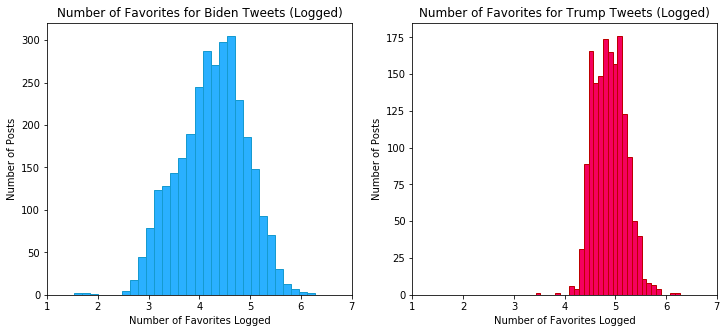

In [60]:
# Favorites logged

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(np.log10(biden["favourite"]), bins = 30, facecolor = '#2ab0ff', edgecolor='#169acf')
ax1.set_title("Number of Favorites for Biden Tweets (Logged)")
ax1.set_xlabel("Number of Favorites Logged")
ax1.set_ylabel("Number of Posts")
ax1.set_xlim([1,7])

nozeros = trump[trump['favourite'] > 0]
ax2.hist(np.log10(nozeros['favourite']), bins = 30, facecolor = "#f5005f", edgecolor='#bd0000')
ax2.set_title("Number of Favorites for Trump Tweets (Logged)")
ax2.set_xlabel("Number of Favorites Logged")
ax2.set_ylabel("Number of Posts")
ax2.set_xlim([1,7])

plt.show()


#### As seen above, both candidates' graphs exhibited approximately normal distributions. However, Trump's plot is clearly more concentrated and centered at around 5, while Biden's is more dispersed and centered at around 4.5. This suiggests that on average, Trump's posts received more consistent number of favourites as well as greater number of favourites.

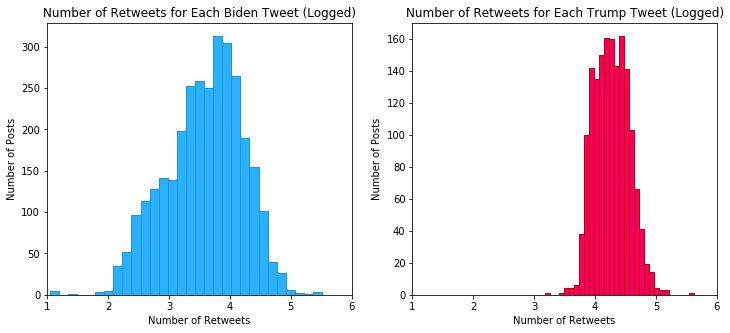

In [61]:
# Retweets logged

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(np.log10(biden["retweets"]), bins = 30, facecolor = '#2ab0ff', edgecolor='#169acf')
ax1.set_title("Number of Retweets for Each Biden Tweet (Logged)")
ax1.set_xlabel("Number of Retweets")
ax1.set_ylabel("Number of Posts")
ax1.set_xlim([1,6])

nozeros = trump[trump['retweets'] > 0]
ax2.hist(np.log10(nozeros["retweets"]), bins = 30, facecolor = "#f5005f", edgecolor='#bd0000')
ax2.set_title("Number of Retweets for Each Trump Tweet (Logged)")
ax2.set_xlabel("Number of Retweets")
ax2.set_ylabel("Number of Posts")
ax2.set_xlim([1,6])

plt.show()

#### As seen above, both candidates exhibited approximately normal distributions of number of retweets. However, Biden's distirbution seems more centered to the right with a longer tail to the left, whereas Trump's distribution is more normal. It is a bit surprising that Trump's distribution for both number of retweets and favourites exhibit the same normal pattern, suggesting a much more consistent and expectable results from posts. Additionally, Trump's distribution centers on around 4.5, whereas Biden's centers on around 3.5. This again shows how Trump's posts, on average, are more widely received than Biden's, which is consistent with the previous plots as well as our summary statistics.

#### Next, we display side-by-side boxplots comparing Biden and Trump's number of words in tweets. As shown below, Biden clearly has more words on average than Trump: his plot's Q1, Q3, as well as median are all above Trump's, giving a clear indication that his tweets are longer in length. Noticeably, the median for Trump's tweets lies at around 15 words and around 35 for Biden's tweets – Biden's median is more than twice the Trump's median!

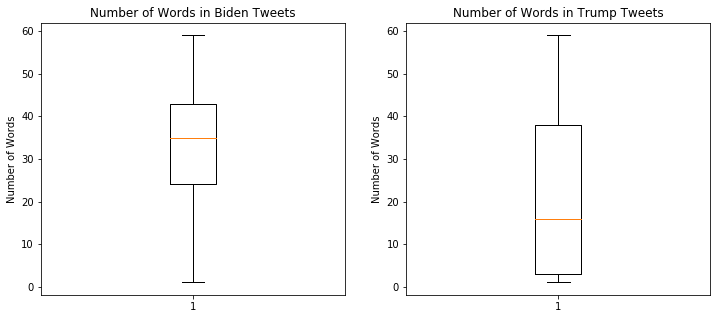

In [62]:
# Number of Words

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.boxplot((biden["tweet_length"]))
ax1.set_title("Number of Words in Biden Tweets")
ax1.set_ylabel("Number of Words")

ax2.boxplot(trump["tweet_length"])
ax2.set_title("Number of Words in Trump Tweets")
ax2.set_ylabel("Number of Words")

plt.show()

#### We see the same pattern in histogram distributions: Trump's plot has a significant peak at 0-5 words, matching the low Q1 and median seen in the boxplot above. In contrast, Biden's distribution has a tail to the left, suggesting a higher median and reflected by the slightly greater distance between median and Q1, where distance suggests sparcity and thus fewer observations.

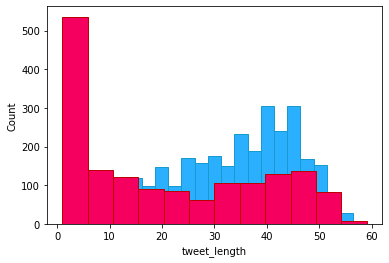

In [63]:
# tweet length differences between Trump and Biden 
sns.histplot(x='tweet_length', facecolor = '#2ab0ff', edgecolor='#169acf', data = biden)
sns.histplot(x='tweet_length',  facecolor = "#f5005f", edgecolor='#bd0000', data = trump)
plt.show()

#### We then plotted number of words against number of favourites, expecting an association between the two variables. However, as shown in the scatterplots below, there does not seem to be a clear relationship between the two. The distribution seems flat – the number of favourites does not vary substantially as number of words changes.

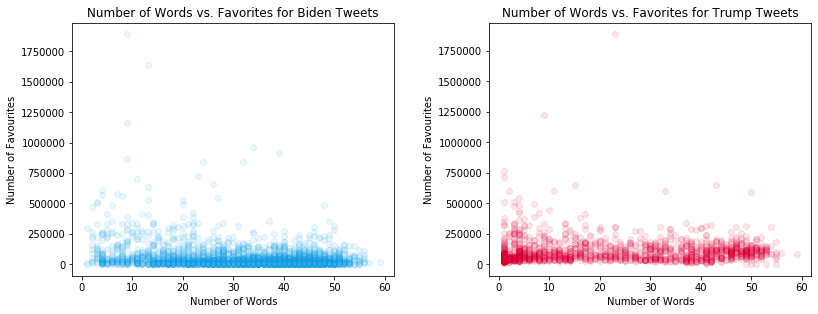

In [64]:
# Number of Words vs. Favorites

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(x = "tweet_length", y = "favourite", data= biden, alpha = 0.1, facecolor = '#2ab0ff', edgecolor='#169acf')
ax1.set_title("Number of Words vs. Favorites for Biden Tweets")
ax1.set_xlabel("Number of Words")
ax1.set_ylabel("Number of Favourites")

ax2.scatter(x = 'tweet_length', y = 'favourite', data = trump, alpha = 0.1, facecolor = "#f5005f", edgecolor='#bd0000')
ax2.set_title("Number of Words vs. Favorites for Trump Tweets")
ax2.set_xlabel("Number of Words")
ax2.set_ylabel("Number of Favourites")

fig.tight_layout(pad=3.0)
plt.show()

#### Continuing, we plot number of favourites logged versus number of retweets logged, obtaining a pattern that matches with our expectations: there is a strong positive association between the two, suggesting that as number of favourites increases, so does the number of retweets. We note that the relationship is one of association as opposed to cause-and-effect. We merely observe that the relationship tend to exist between the two variables, but that doesn't mean that one causes the other.

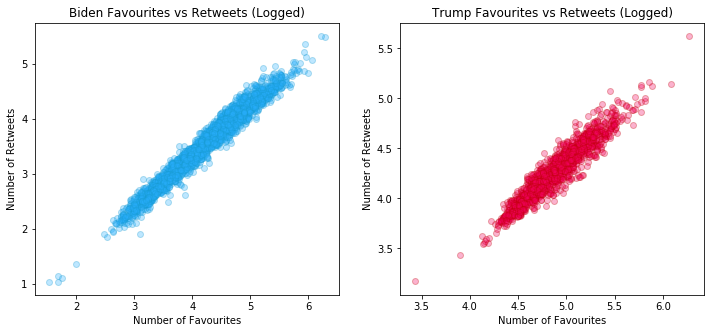

In [65]:
# Logged favorites vs. retweets

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(x = np.log10(biden['favourite']), y = np.log10(biden['retweets']), alpha=0.3, facecolor = '#2ab0ff', edgecolor='#169acf')
ax1.set_xlabel('Number of Favourites')
ax1.set_ylabel('Number of Retweets')
ax1.set_title('Biden Favourites vs Retweets (Logged)')

fav_filter = trump[trump['favourite'] > 0]
retweet_filter = trump[trump['retweets'] > 0]
ax2.scatter(x = np.log10(fav_filter['favourite']), y = np.log10(retweet_filter['retweets']), alpha=0.3, facecolor = "#f5005f", edgecolor='#bd0000')
ax2.set_xlabel('Number of Favourites')
ax2.set_ylabel('Number of Retweets')
ax2.set_title('Trump Favourites vs Retweets (Logged)')

plt.show()

# Twitter Usage and Popularity Over Time Analysis

The following analysis will examine how the characteristics of Biden's and Trump's tweets changed as the 2020 Presidential Election drew nearer. To start each analysis, each tweet's date (converted to days before election) will be plotted against another characteristic of the tweet. These other characteristics include the length of the tweet, number of favorites, number of retweets, and the number of tweets Biden and Trump published that day. Along with these scatterplots We also plotted the line of best fit for each pair of variables for both Biden's and Trump's tweets. Because we are interested in the change over time of the tweet characteristics mentioned above, we will be conducting statistical significance tests for the slope of the regression line. The slopes have practical meaning becuase they indicate the daily change in the expected length, favorites, retweets, or number of tweets (depending on which variable we are studying in the analysis). Positive slopes indicate that the tweet characteristic is expected to decrease as the election drew nearer. Negative slopes on the other hand indicate that the tweet characteristic is expected to increase. Our null hypothesis is that each slope will be 0, indicating no change over time. The alternate hypothesis is that the slopes are not 0, indicating a change over time. We will use an alpha level of 0.05, so we will consider any p-value < 0.05 to be significant.   


In [66]:
def days_analysis(name1, name2, dependent_variable):
    '''
    name1: The name of a dataframe. The data frame must contain days_to_election and dependent_variable columns.
    In other words, name1["days_to_election"] and name1[dependent_variable] must exist.
    name2: The name of another dataframe. The data frame must contain days_to_election and dependent_variable columns.
    In other words, name2["days_to_election"] and name2[dependent_variable] must exist.
    dependent_variable: A string. Represents the variable to be studied along with days_to_election.
    name1[dependent_variable] and name2[dependent_variable] must exist
    Prints: Plots of days_to_election and dependent_variable for the name1 and name2 dataframes.
    Also prints the slope of the regression line, the t statistic, and the p value for significance tests
    of the slope of the regression line for the name1 and name2 datafames
    Returns: Prints an empty string if the analysis executed with no errors.
    '''
    print("An analysis of days_to_election vs. " + dependent_variable)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Biden line of best fit
    name1_model = linear_model.LinearRegression().fit(name1[["days_to_election"]], name1[dependent_variable])
    name1_predict = name1_model.predict(name1[["days_to_election"]])
    
    # Biden scatterplot with line of best fit
    ax1.scatter(name1["days_to_election"], name1[dependent_variable], alpha = 0.6, color = "blue", facecolor = '#2ab0ff')
    ax1.plot(name1["days_to_election"], name1_predict, c = "black")
    ax1.set_title("days_to_election vs." + dependent_variable + " for Biden Tweets")
    ax1.set_xlabel("Days to Election")
    ax1.set_ylabel(dependent_variable)
    
    # Trump line of best fit
    name2_model = linear_model.LinearRegression().fit(name2[["days_to_election"]], name2[dependent_variable])
    name2_predict = name2_model.predict(name2[["days_to_election"]])

    # Trump scatterplot with line of best fit
    ax2.scatter(name2["days_to_election"], name2[dependent_variable], alpha = 0.6, color = "red", facecolor = "#f5005f")
    ax2.plot(name2["days_to_election"], name2_predict, c = "black")
    ax2.set_title("days_to_election vs." + dependent_variable + " for Trump Tweets")
    ax2.set_xlabel("Days to Election")
    ax2.set_ylabel(dependent_variable)

    plt.show()
    
    print("Important values for the days_to_election vs. " + dependent_variable + " analysis")
    
    # Biden slope of the line of best fit significance test
    name1_test = sm.OLS(name1[dependent_variable], sm.add_constant(name1[["days_to_election"]]))
    name1_test2 = name1_test.fit()
    print("Biden regression coefficient: " + "{:.2f}".format(name1_test2.params[1]))
    print("Biden test statistic for regression slope: " + "{:.2f}".format(name1_test2.tvalues[1]))
    print("Biden p-value for regression slope test: " + "{:.3f}".format(name1_test2.pvalues[1]))

    # Trump slope of the line of best fit significance test
    name2_test = sm.OLS(name2[dependent_variable], sm.add_constant(name2[["days_to_election"]]))
    name2_test2 = name2_test.fit()
    print("Trump regression coefficient: " + "{:.2f}".format(name2_test2.params[1]))
    print("Trump test statistic for regression slope: " + "{:.2f}".format(name2_test2.tvalues[1]))
    print("Trump p-value for regression slope test: " + "{:.3f}".format(name2_test2.pvalues[1]))
    
    return("")

## Days To Election vs. Tweet Length

An analysis of days_to_election vs. tweet_length


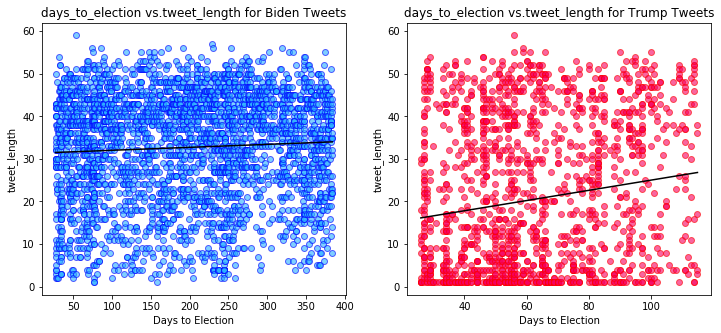

Important values for the days_to_election vs. tweet_length analysis
Biden regression coefficient: 0.01
Biden test statistic for regression slope: 3.18
Biden p-value for regression slope test: 0.001
Trump regression coefficient: 0.12
Trump test statistic for regression slope: 6.17
Trump p-value for regression slope test: 0.000



/Users/sunil/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [67]:
print(days_analysis(biden, trump, "tweet_length"))

#### Explanation

The graphs above show the number of words that Biden and Trump used in each tweet and when the tweet was posted. Both graphs show that Biden's and Trump's tweets each have a high word count range, and that this range is consistently large regardless of the day the tweet is posted. The least-squares regression lines for both Biden's and Trump's tweets have positive slopes, indicating that both candidates used fewer words in their tweets as the election drew nearer. Specifically, with each passing day Biden's tweets are expected to have 0.01 fewer words, while Trump's tweets are expected to have 0.12 fewer words with each passing day. These slopes are both significant at the alpha = 0.05 level (P < 0.05), which suggests that the wordiness of Biden's and Trump's tweets does change as the 2020 election drew nearer. 

## Days to Election vs. Number of Favorites

An analysis of days_to_election vs. favourite


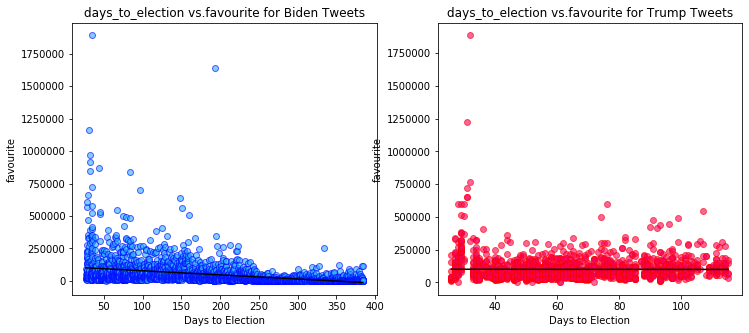

Important values for the days_to_election vs. favourite analysis
Biden regression coefficient: -316.70
Biden test statistic for regression slope: -21.41
Biden p-value for regression slope test: 0.000
Trump regression coefficient: -16.27
Trump test statistic for regression slope: -0.15
Trump p-value for regression slope test: 0.881



/Users/sunil/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [68]:
print(days_analysis(biden, trump, "favourite"))

#### Explanation

The graphs above show the number of favorites that each Biden and Trump tweet received and when the tweet was posted. These graphs show some outliers for both Biden and Trump, with a few of their tweets each receiving more than 1 million favorites. Still, most Biden and Trump tweets received 500,000 or less favroites. The least-squares regression lines have negative slopes for both Biden's and Trump's tweets, which indicates that more people liked their tweets as the election drew nearer. Specifically, with each passing day Biden's tweets are expected to receive about 317 more favorites than the previous day, and Trump's tweets are expected to receive about 16 more favorites than the previous day leading up to the election. It is interesting that Biden's tweets became more popular at a faster rate than Trump's tweets, and that only the slope of the regression line for Biden's tweets is significant at the alpha = 0.05 level (P < 0.05). One possible explanation for this is that because Trump was president during the study, his candidacy was not as exciting as Joe Biden's. This explanation could explain why the earliest tweets we sampled from Biden have far fewer favorites than his tweets from closer to the election.

## Days to Election vs. Number of Retweets

An analysis of days_to_election vs. retweets


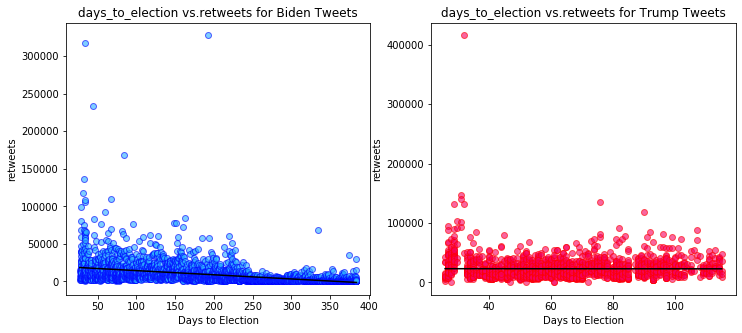

Important values for the days_to_election vs. retweets analysis
Biden regression coefficient: -55.56
Biden test statistic for regression slope: -22.83
Biden p-value for regression slope test: 0.000
Trump regression coefficient: -1.89
Trump test statistic for regression slope: -0.09
Trump p-value for regression slope test: 0.929



/Users/sunil/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [69]:
print(days_analysis(biden, trump, "retweets"))

#### Explanation

The graphs above show the number of retweets that each Biden and Trump tweet received and when the tweet was posted. These graphs show some outliers for both Biden and Trump, with a few of their tweets each receiving more than 100,000 retweets. Still, most Biden and Trump tweets received 50,000 or less retweets. The least-squares regression lines have negative slopes for both Biden's and Trump's tweets, which indicates that more people retweeted their tweets as the election drew nearer. Specifically, with each passing day Biden's tweets are expected to receive about 56 more retweets than the previous day, and Trump's tweets are expected to receive about 2 more retweets than the previous day leading up to the election. It is interesting that Biden's tweets grew in popularity at a faster rate than Trump's tweets, and that only the slope of the regression line for Biden's tweets is significant at the alpha = 0.05 level (P < 0.05). Like with the analysis of the number of favorites each tweet received, one possible explanation for these findings is that because Trump was president during the study his candidacy was not as exciting as Joe Biden's. This explanation could explain why the earliest tweets we sampled from Biden have far fewer retweets than his tweets from closer to the election.

## Days to Election vs. Number of Tweets

An analysis of days_to_election vs. tweets_each_day


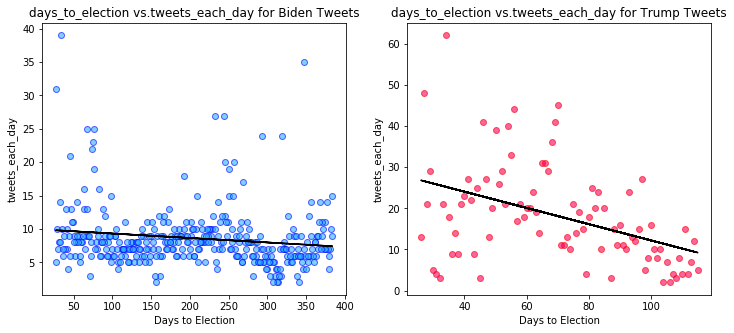

Important values for the days_to_election vs. tweets_each_day analysis
Biden regression coefficient: -0.01
Biden test statistic for regression slope: -2.88
Biden p-value for regression slope test: 0.004
Trump regression coefficient: -0.20
Trump test statistic for regression slope: -4.48
Trump p-value for regression slope test: 0.000



/Users/sunil/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [70]:
print(days_analysis(bidenbyday, trumpbyday, "tweets_each_day"))

#### Explanation

The graphs above show the number of tweets Biden and Trump posted each day leading up to the election. These graphs show some outliers for both Biden and Trump when they had particularly active days on social media. One interesting feature of these graphs is that it is clear Trump is a more active tweeter than Biden based on his high number of tweets each day. The least-squares regression lines have negative slopes for both Biden's and Trump's tweets, which indicates that Biden and Trump were tweeting more as the election drew nearer. Specifically, with each passing day Biden's is expected to post about 0.01 more tweets than the previous day, and Trump's is expected to tweet about 0.20 more than the previous day leading up to the election. Both Biden's and Trump's increasing tweeting frequency is significant at the alpha = 0.05 level (P < 0.05), which suggests that Biden and Trump truly were tweeting more as the election drew nearer

# Sentiment Analysis

### Get Texts of Each Tweet into a new DataFrame

In [71]:
biden_text = biden['full_text']
trump_text = trump['full_text']

### Get Sentiment of Each Tweet

In [72]:
biden_sent_list_polarity = []
biden_sent_list_subjectivity = []
trump_sent_list_polarity = []
trump_sent_list_subjectivity = []
for i in biden_text:
    tweet = TextBlob(i)
    biden_sent_list_polarity.append(tweet.sentiment.polarity)
    biden_sent_list_subjectivity.append(tweet.sentiment.subjectivity)
for i in trump_text:
    tweet = TextBlob(i)
    trump_sent_list_polarity.append(tweet.sentiment.polarity)
    trump_sent_list_subjectivity.append(tweet.sentiment.subjectivity)

trump_sent = pd.DataFrame({'Polarity': trump_sent_list_polarity,
                          'Subjectivity': trump_sent_list_subjectivity})
biden_sent = pd.DataFrame({'Polarity': biden_sent_list_polarity,
                          'Subjectivity': biden_sent_list_subjectivity})

biden_sent["date"] = pd.to_datetime(biden["created_at"], format = "%Y-%m-%d %H:%M:%S")
trump_sent["date"] = pd.to_datetime(trump["created_at"], format = "%Y-%m-%d %H:%M:%S")

#### Explanation of Subjectivity and Polarity

From TextBlob Tutorial: The sentiment property returns a named tuple of the form Sentiment(polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

## Plots 

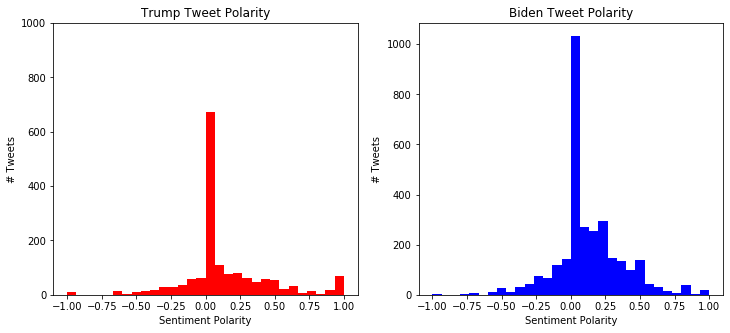

In [73]:
#Histogram of polarity 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.hist(trump_sent['Polarity'],bins = 30,color = 'red')
ax2.hist(biden_sent['Polarity'],bins = 30, color = 'blue')

ax1.set_xlabel('Sentiment Polarity')
ax1.set_ylabel('# Tweets')
ax1.set_title("Trump Tweet Polarity")

ax2.set_xlabel('Sentiment Polarity')
ax2.set_ylabel('# Tweets')
ax2.set_title("Biden Tweet Polarity")

ax1.set_ylim(0,1000)

plt.show()

#### Explanation

These graphs show histograms of the polarity distribution of trumps and bidens tweets. We can see that the distribution is fairly similar, however Biden has more tweets in the dataframe due to the twitter API. Furthermore Trump's distribution is more skewed, with more variance in polarity of tweets compared to biden.

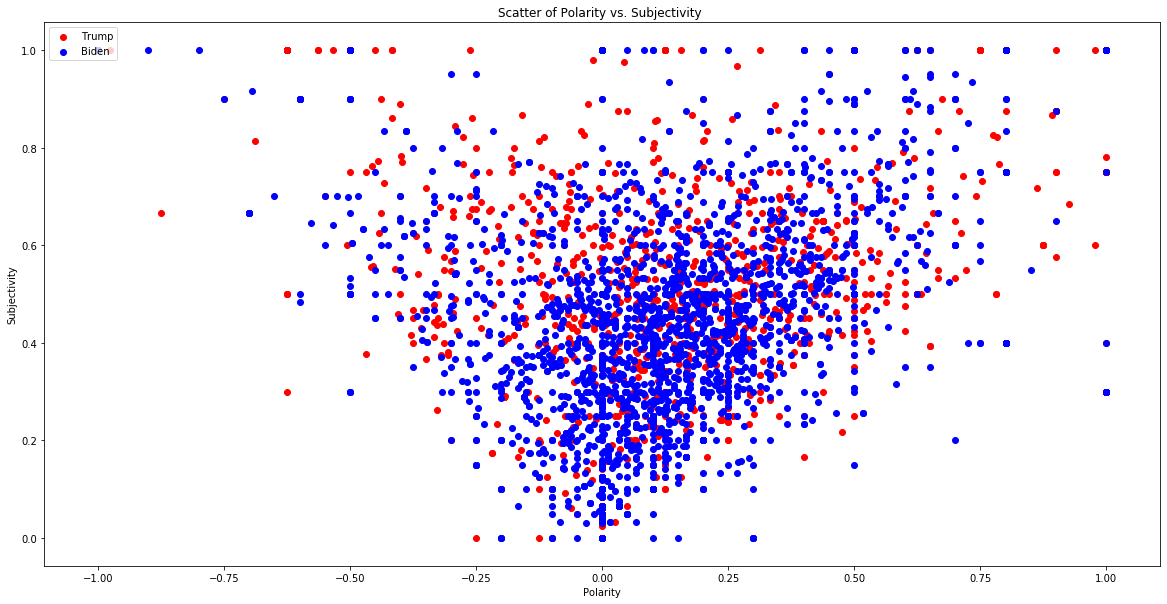

In [74]:
#Scatter of polarity and Subjectivity
fig, ax = plt.subplots(figsize=(20,10))
plt.scatter(trump_sent['Polarity'], trump_sent['Subjectivity'],color = 'red', label = 'Trump')
plt.scatter(biden_sent['Polarity'], biden_sent['Subjectivity'], color = 'blue', label = 'Biden')

plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title("Scatter of Polarity vs. Subjectivity ")
plt.legend(loc="upper left")
plt.show()

#### Explanation

This graph shows a scatter plot of polarity vs subjectivity of Trumps and Biden's tweets, we can see once again that the distribution is fairly similar, however trump has more negative tweets in comparison to bidens.


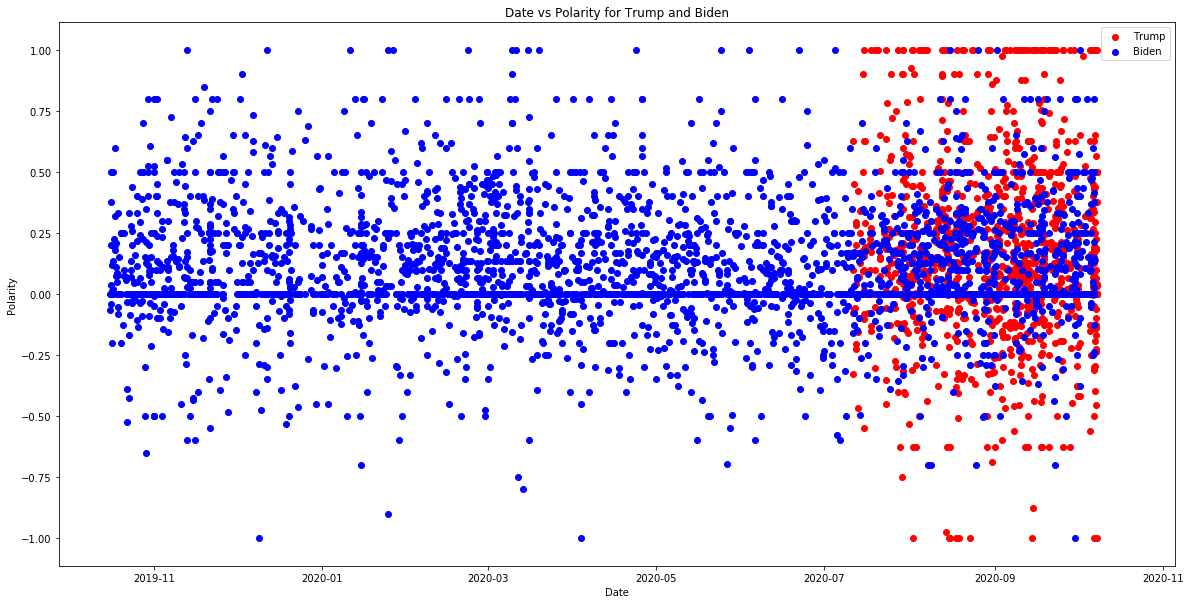

In [75]:
fig, ax = plt.subplots(figsize=(20,10))
plt.scatter(trump_sent['date'],trump_sent['Polarity'],color = 'red', label = 'Trump')
plt.scatter(biden_sent['date'],biden_sent['Polarity'], color = 'blue', label = 'Biden')

plt.xlabel('Date')
plt.ylabel('Polarity')
plt.title("Date vs Polarity for Trump and Biden")
plt.legend()
plt.show()

#### Explanation

This plot shows polarity by date for Biden and Trumps tweets, we can see that we have a far larger dataset of Biden's tweets due to issues with the twitter API. We can also see that trump on any given day has a wider distribution of polarity than Biden does. 

#### Conclusion

We found that sentiment analysis (at least through the TextBlob package) is not particulaury effective in predicting who will win the election. It shows us that Trump's tweets are more volatile and have a greater degree of variability in polarity and subjectivity, in comparison to Biden who sticks more to neutral messaging. However this conclusion is easily deducible from just a cursory look at Biden's and Trump's tweets. Furthermore, if we were to do this again we would aim to get a package that is specifically trained on political tweets and can do a better job of giving context to Biden's and Trump's tweets. Another limitation of sentiment analysis in this context is that it extracts the key words from the text and uses an algorithm to assign a score. An algorithm that judges sentiment can be extremely subjective, and different algorithms for sentiment can produce different results. 

# Sentiment Analysis Without Using an Algorithm

In [76]:
from collections import Counter 
from string import punctuation
  
allbidenwords = ""

#concatenate texts in all of biden's post into one string, making them all lowercase
for i in range(len(biden)):
    allbidenwords+=biden['full_text'][i].lower()

#transforms the concatenated string into a list of all the words in the string
allbidenwords2 = allbidenwords.split()

#download the nltk packages – action required running this code: go to Corpora, and download "stopwords"
import nltk

from nltk.corpus import stopwords

#obtain the english stopwords

stopwords = stopwords.words('english')

#create and add our own list of english stopwords

additionalstopwords=['',"—","-","need","get","make","every","one","us","take","it’s","it.","we're","i'll","i'm","let","can't","going","would"]

for i in range(len(additionalstopwords)):
    stopwords.append(additionalstopwords[i])
    
#remove all leading and trailing punctuations of biden's words
for i in range(len(allbidenwords2)):
    allbidenwords2[i]=allbidenwords2[i].strip(punctuation)
    
#create a new counter object which we will use to count the words and their frequencies

Counter = Counter(allbidenwords2) 

#returns the top-200 most freqeunt words and their count
bidenmostfrequentwords = Counter.most_common(200)

#filter out the english stopwords from the list of words

bidenmostfrequentwords = [(word, count) for word, count in bidenmostfrequentwords if word not in stopwords]
  
#print only the top-30 most frequent words and their count
print(bidenmostfrequentwords[:30]) 


[('trump', 796), ('president', 737), ('donald', 499), ('nation', 346), ('american', 335), ('country', 306), ('people', 289), ('day', 271), ('time', 241), ('crisis', 220), ('care', 214), ('health', 212), ('help', 211), ('together', 207), ('today', 206), ('america', 197), ('americans', 183), ('work', 176), ('years', 175), ('white', 170), ('back', 168), ('know', 157), ('campaign', 151), ('better', 148), ('house', 143), ('covid-19', 142), ('world', 137), ('like', 137), ('must', 134), ('never', 132)]


In [77]:
from collections import Counter 
from string import punctuation

alltrumpwords = ""

#concatenate texts in all of trump's post into one string, making them all lowercase
for i in range(len(trump)):
    alltrumpwords+=trump['full_text'][i].lower()

#transforms the concatenated string into a list of all the words in the string
alltrumpwords2 = alltrumpwords.split()

#download the nltk packages – action required running this code: go to Corpora, and download "stopwords"
import nltk

#nltk.download() <--uncomment this code to do the installation

from nltk.corpus import stopwords

#obtain the english stopwords

stopwords = stopwords.words('english')

#create and add our own list of english stopwords

additionalstopwords=['',"—","-","need","get","make","every","one","us","take","it’s","it.","we're","i'll","i'm","let","can't","going","would"]

for i in range(len(additionalstopwords)):
    stopwords.append(additionalstopwords[i])
    
#remove all leading and trailing punctuations of trump's words
for i in range(len(alltrumpwords2)):
    alltrumpwords2[i]=alltrumpwords2[i].strip(punctuation)
    
#create a new counter object which we will use to count the words and their frequencies

Counter = Counter(alltrumpwords2) 

#returns the top-200 most freqeunt words and their count
trumpmostfrequentwords = Counter.most_common(200)

#filter out the english stopwords from the list of words

trumpmostfrequentwords = [(word, count) for word, count in trumpmostfrequentwords if word not in stopwords]
  
#print only the top-30 most frequent words and their count
print(trumpmostfrequentwords[:30])

[('great', 200), ('amp', 194), ('biden', 131), ('people', 120), ('joe', 99), ('news', 94), ('fake', 88), ('never', 84), ('vote', 78), ('country', 74), ('big', 73), ('even', 71), ('total', 70), ('democrats', 69), ('president', 69), ('many', 65), ('left', 64), ('like', 61), ('new', 61), ('want', 60), ('back', 60), ('complete', 59), ('maga', 58), ('endorsement', 58), ('thank', 57), ('years', 56), ('state', 56), ('election', 56), ('win', 53), ('radical', 53)]


Next, we sentiment code the top 30 words from each candidates into three categories: positive, neutral, and negative.

In [78]:
print("Biden's top-30 most frequent words are:\n")
print(bidenmostfrequentwords[:30])
print("\nTrump's top-30 most frequent words are:\n")
print(trumpmostfrequentwords[:30])

Biden's top-30 most frequent words are:

[('trump', 796), ('president', 737), ('donald', 499), ('nation', 346), ('american', 335), ('country', 306), ('people', 289), ('day', 271), ('time', 241), ('crisis', 220), ('care', 214), ('health', 212), ('help', 211), ('together', 207), ('today', 206), ('america', 197), ('americans', 183), ('work', 176), ('years', 175), ('white', 170), ('back', 168), ('know', 157), ('campaign', 151), ('better', 148), ('house', 143), ('covid-19', 142), ('world', 137), ('like', 137), ('must', 134), ('never', 132)]

Trump's top-30 most frequent words are:

[('great', 200), ('amp', 194), ('biden', 131), ('people', 120), ('joe', 99), ('news', 94), ('fake', 88), ('never', 84), ('vote', 78), ('country', 74), ('big', 73), ('even', 71), ('total', 70), ('democrats', 69), ('president', 69), ('many', 65), ('left', 64), ('like', 61), ('new', 61), ('want', 60), ('back', 60), ('complete', 59), ('maga', 58), ('endorsement', 58), ('thank', 57), ('years', 56), ('state', 56), ('el

In [79]:
bidenpositive=["nation","american","country","people","care","health","help","together","america","americans","better","like"]
bidenneutral=["trump","president","donald","day","time","today","work","years","white","back","know","campaign","house","covid-19","world","must"]
bidennegative=["crisis","never"]

print(len(bidenpositive))
print(len(bidenneutral))
print(len(bidennegative))

12
16
2


In [80]:
trumppositive=["great","people","vote","country","big","many","like","new","want","complete","maga","endorsement","thank","win"]
trumpneutral=["amp","biden","joe","news","even","total","democrats","president","left","back","years","state","election"]
trumpnegative=["fake","never","radical"]

print(len(trumppositive))
print(len(trumpneutral))
print(len(trumpnegative))

14
13
3


As shown above, 12 out of the top-30 most frequently used words by Biden are positive, 16 are neutral, and 2 are negative. On the other hand, 14 out of the top-30 most frequently used words by trump are positive, 13 are neutral, and 3 are negative. This mirrors our results of sentiment analysis, which found that Trump had a lot more positive tweets than Biden (as seen through 14 > 12) as well as more negative tweets than Biden (as seen through 3 > 2). This adds further credibility to our findings that Trump's results seem more polarized and subjective than Biden's, as demonstrated in the polarity vs subjectivity plots.

# Logistic Regression Analysis
### Research Question: Does the time of day impact tweet behavior? 
#### null hypothesis : time of day does not impact amount of favorites recieved by a tweet <- check for both trump and biden
* We use the time of day to predict whether a tweet is heavily liked (relative to each Twitter account). We define a heavily like tweet as a tweet recieving more likes than the median liked value of that Twitter account. 

In [81]:
print("Biden favourite median value: {}".format(biden['favourite'].median()))
print("Trump favourite median value: {}".format(trump['favourite'].median()))

Biden favourite median value: 19678.5
Trump favourite median value: 74137.0


In [82]:
from sklearn.linear_model import LogisticRegression

def liked_b(x):
    if x > 19678.5:
        return 1 
    else:
        return 0 
    
def liked_t(x):
    if x > 74137.0:
        return 1 
    else:
        return 0 
biden['loved'] = biden['favourite'].map(liked_b)
trump['loved'] = trump['favourite'].map(liked_t)

def logit(x):
    return np.exp(x) / (np.exp(x) + 1)

def log_reg(biden, trump):
    x = 0
    subplot = [121, 122]
    title = ['Biden', 'Trump']
    color = ['blue', 'red']
    df = [biden, trump]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax = [ax1, ax2]
    accuracy = []
    for i in df: 
        model = LogisticRegression(solver = "lbfgs").fit(i[['hour']], i['loved'])
        x_values = np.linspace(0, 23, 100) 
        ax[x].scatter(i['hour'], i['loved'] + np.random.normal(0, 0.05, size=len(i)), alpha = .1, color = color[x])
        ax[x].plot(x_values, logit(x_values * model.coef_[0,0] + model.intercept_[0]), color = color[x])
        ax[x].set_title(title[x])
        ax[x].set_xlabel("hour")
        ax[x].set_ylabel("probability of loved tweet")
        
        x +=1
        accuracy.append(model.score(i[['hour']], i['loved']))
    
    for i in range(len(accuracy)):
        print(title[i] + " model accuracy: {}%".format(round(accuracy[i]*100, 3)))


Biden model accuracy: 49.189%
Trump model accuracy: 50.591%


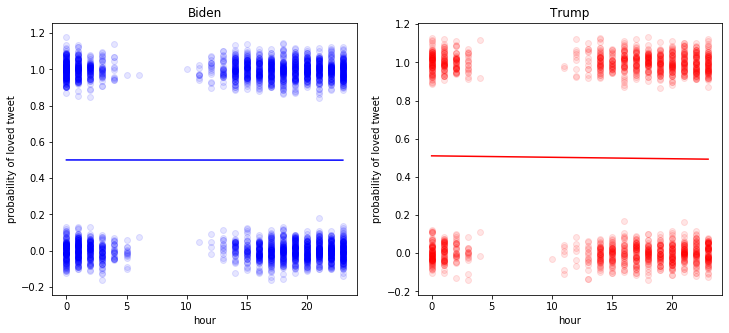

In [83]:
log_reg(biden, trump)

The points in the plot reflect the actual data in the datasets. These values are either 0 or 1, depending on if the tweet is classified as heavily liked (1 if so, 0 if not). We added some noise to the points, so that the magnitude of heavily liked tweets at a given hour could be visualized. The line in each graph is close to a horizontal line (slope of 0) with a value of 0.5. This means the probability of a loved tweets remains constant at 50%, which is the same as pure chance. By looking at the points in the graph, it makes sense why this line was generated. At each hour there are similar amounts of heavily liked tweets and not heavily liked tweets. 

From the logistic regression, there is not a strong correlation between the time a tweet is posted (hour of the day) and the probability of a heavily liked tweet for either Trump or Biden. Both models have ~50% accuracy, which indicates that random chance would perform just as well. This shows that time of day by itself is not a good predictor. Between 5 am to 10 am, there does not seem to be any Twitter activity for both accounts. Thus, we wonder if fitting a bimodal distribution would benefit the model. 

# Cluster Analysis 
* Initially, we were planning on doing a cluster analysis using time of day as a predictor. However, after performing a logistic regression analysis using time of day as a predictor of a highly-liked tweet, we found that time of day would not be a good predictor. Additionally, when we added time of day as a parameter in the clustering algorithm, it decreased the accuracy substantially. 
* See the appendix section to see graphs that we used to explore if clustering by time would make sense
* We used the KMeans clustering algorithm to build multiple prediction models to predict if a tweet was from Trump or Biden. The KMeans clustering algorithm works by inputting a fixed number of clusters (2 in our case, for Trump and Biden), and then grouping similar data points into certain clusters, which can sometimes reveal patterns in the data. 

Actual trump biden distribution: 


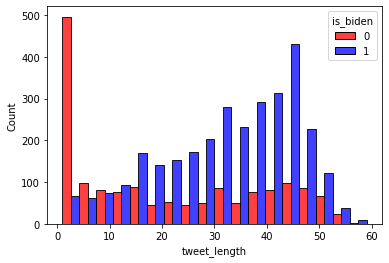

In [84]:
from sklearn.cluster import KMeans
# assign biden tweets a value of 1 and trump tweets value of 0
biden['is_biden'] = 1
trump['is_biden'] = 0

# combine dfs 
combined_dfs = pd.concat([biden,trump], sort = True)

# 1 parameter 
clustering = KMeans(n_clusters = 2, random_state = 15)
cluster_labels = clustering.fit_predict(combined_dfs[['tweet_length']])
combined_dfs['cluster_bylength'] = cluster_labels 

# 2 parameters 
clustering2 = KMeans(n_clusters = 2, random_state = 15)
cluster_labels_fav_len = clustering2.fit_predict(combined_dfs[['tweet_length', 'favourite']])
combined_dfs['cluster_bylength_likes'] = cluster_labels_fav_len

# multiple parameters <- recognize overfitting can occur as more variables are added to prediction algorithm 
clustering3 = KMeans(n_clusters = 2, random_state = 15)
cluster_labels_mult = clustering3.fit_predict(combined_dfs[['tweet_length', 'favourite', 'retweets']])
combined_dfs['cluster_mult'] = cluster_labels_mult

# see mapping of clusters
palette = {0: 'red', 1: 'blue'}
print("Actual trump biden distribution: ")
sns.histplot(x = 'tweet_length', hue = 'is_biden', data = combined_dfs, multiple="dodge", palette = palette)
plt.show()

Prediction model cluster using tweet length as only predictor: 


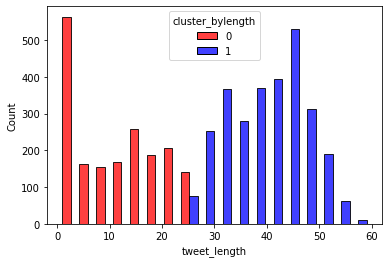

In [85]:
palette = {0: 'red', 1: 'blue'}
print('Prediction model cluster using tweet length as only predictor: ')
sns.histplot(x = 'tweet_length', hue = 'cluster_bylength', data = combined_dfs, multiple="dodge", palette = palette)
plt.show()

In [86]:
# compute accuracy 
combined_dfs = combined_dfs.reset_index(drop = True)

def accuracy(x, col1, col2):
    correct = 0 
    
    for i in range(len(x)):
        
        if x[col1][i] == 1 and x[col2][i] == 1:
            correct += 1
        elif x[col1][i] == 0 and x[col2][i] == 0:
            correct += 1
        else: 
            correct += 0
    return (correct / len(x)) * 100

print('Accuracy of clustering prediction algorthim using only tweet length as predictor:')
print("{}%".format(accuracy(combined_dfs, 'is_biden', 'cluster_bylength')))
print('\n')
# subtracted from 100, because the clusters mapped to opposite values in is_biden 
print('Accuracy of clustering prediction algorithm using favorite count and tweet length as predictors:')
print("{}%".format(100-accuracy(combined_dfs, 'is_biden', 'cluster_bylength_likes')))
print("\n")
print("Accuracy of clustering prediction algorithm using retweet count, favorite count and tweet length as predictors:")
print("{}%".format(100-accuracy(combined_dfs, 'is_biden', 'cluster_mult')))


Accuracy of clustering prediction algorthim using only tweet length as predictor:
67.98124067363037%


Accuracy of clustering prediction algorithm using favorite count and tweet length as predictors:
66.76614794286932%


Accuracy of clustering prediction algorithm using retweet count, favorite count and tweet length as predictors:
67.08590918780644%


KMeans clustering prediction model solidifies our previous inferences. It was very hard to differentiate Biden and Trump tweets by comparing favorite and retweet counts. However, the tweeet length of Biden and Trump tweets did differ as shown by the histogram above (Trump has many short tweets). The model reflects this. The tweet length is the strongest predictor and adding extra predictors did not impact the model's accuracy. By relying on tweet length as the main predictor, however, the model is not able to predict lengthy Trump tweets and short Biden tweets. Thus, the model is ultimately not very informative. To improve the model, we recommend using predictors that account for the content of the tweet.

### Attempt at using content predictors in KMeans model

In [87]:
# top 30 most frequent words of Trump and Biden, generated earlier in the sentiment analysis
# process list to extract words from tuple pair... currently in ("word", counts_total) form (ex: ('great', 200))

biden_most_freq = [i[0] for i in bidenmostfrequentwords]
trump_most_freq = [i[0] for i in trumpmostfrequentwords]

def set_difference(x, y):
    acc = []
    for i in x:
        if i not in y:
            acc.append(i)
    return acc

only_biden = set_difference(biden_most_freq, trump_most_freq)        
only_trump = set_difference(trump_most_freq, biden_most_freq)


We take the set difference between Biden's and Trump's most frequent words to generate two lists that reflect Biden's most frequent words that are not included in Trump's most frequent words and the same for Trump. 

The feature reflects the count of words that are included in a user's most frequent words but not in the other user's most frequent words. For example, the word_freq_t column reflects the count of words in a tweet that are in Trump's most frequent words, but not in Biden's most frequent words. Thus, two columns are created. 

In [88]:
# Generate columns for feature 

def word_freq_b(x):
    acc = 0
    tweet = x.split()
    for word in tweet:
        if (word in only_biden) and (word not in only_trump):
            acc += 1 
    return acc

def word_freq_t(x):
    tweet = x.split()
    acc = 0 
    for word in tweet:
        if (word in only_trump) and (word not in only_biden):
            acc += 1 
    return acc 

def standardize(x, col):
    mean_temp = x[col].mean()
    std_temp = x[col].std()
    
    new = [0] * len(x[col])
    for i in range(len(col)):
        new[i] = (x[col][i] - mean_temp) / std_temp 
    return new

# add more weight to the new predictors because tweet length showed previously that it was not a good predictor
def weight(x):
    return x * 2
combined_dfs['word_freq_b'] = combined_dfs['full_text'].map(word_freq_b)
combined_dfs['word_freq_t'] = combined_dfs['full_text'].map(word_freq_t)

# standardize data 
combined_dfs['word_freq_t_stand'] = standardize(combined_dfs, 'word_freq_t')
combined_dfs['word_freq_b_stand'] = standardize(combined_dfs, 'word_freq_b')
combined_dfs['tweet_length_stand'] = standardize(combined_dfs, 'tweet_length')

# weight new features higher than tweet length 
combined_dfs['word_freq_t_stand'].map(weight)
combined_dfs['word_freq_b_stand'].map(weight)

# add feature to prediction model in addition to tweet_length, ommited word_freq_b_stand because it did not improve model
clustering4 = KMeans(n_clusters = 2, random_state = 15)
cluster_with_content = clustering4.fit_predict(combined_dfs[['word_freq_t_stand', 'tweet_length']])
combined_dfs['cluster_with_content'] = cluster_with_content

# compute accuracy 
print('Accuracy of clustering prediction algorthim using tweet length and content as predictors:')
print("{}%".format(accuracy(combined_dfs, 'is_biden', 'cluster_with_content')))


Accuracy of clustering prediction algorthim using tweet length and content as predictors:
67.98124067363037%


The cluster analysis did not improve by counting the number of words that are included in a user's most frequent words but not in the other user's most frequent words. This suggests that of Trump and Biden's most frequent words there is a considerable amount of overlap, which makes it hard to distinguish their tweets by just looking at if these certain words were included. The next step in trying to classify Biden and Trump tweets would be to analyze the content of their tweets at a deeper level. It could be helpful to find certain phrases or language patterns that are unique to the individual. Additionally, it might be beneficial to add different weights to certain words that could offer more "distinguishing" value. For example, words that Trump or Biden strictly use but the other does not use

# Conclusion

Studying how Biden’s and Trump’s tweets vary as the 2020 election drew nearer yielded surprising results. Most of the significance tests for the slopes of the lines of best fit in this analysis produced statistically significant p-values at the alpha = 0.05 level (p < 0.05). Both Biden’s and Trump’s tweets became shorter as the election drew nearer at statistically significant rates. However, only the change in favorites for Biden’s tweets are significant. Based on the slopes of the lines of best fit, Biden’s tweets were expected to receive about 317 more favorites each day as the election drew nearer, while Trump’s tweets were only expected to receive 16 more favorites each day. Similarly, only Biden’s tweets had a significant rate of change for retweets. While Biden’s tweets were expected to receive about 56 more retweets each day, Trump’s tweets were only expected to receive about two more retweets than the previous day. Finally, both Biden and Trump increased the number of tweets they published at statistically significant rates. These results reveal key insights about the candidates’ Twitter activity and their reception as the election drew nearer. First, both Biden and Trump likely shortened their tweets to deliver more attention-grabbing messages to voters. Second, because Trump was the incumbent his campaign was likely less successful at creating excitement from new supporters compared to Biden’s campaign. This likely resulted in Trump’s tweets not gaining favorites and retweets as quickly as Biden’s tweets. Finally, Biden and Trump likely increased the number of tweets they published each day as the election drew nearer so they could generate excitement and increase their appeal to voters. 

The logistic regression analysis showed that the time of day did not affect the amount of favourites received for both Trump and Biden. Our initial hypothesis was that tweets tweeted at night would receive more likes because we believed that there is greater twitter activity at night. The analysis proved that this was not the case. It is likely that the content of the tweet has the greatest effect on the amount of favourites received. 

The cluster analysis showed that using tweet length as a predictor to classify Biden and Trump tweets was effective to a certain extent. Trump has many short tweets, so the KMeans clustering model created two clusters that were completely based on tweet length. Obviously, this is not very informative. Unfortunately, adding other features such as retweet and favourite amounts did not improve the model at all. We did attempt to use a simple content predictor in the clustering model, but the accuracy did not improve with this addition. Ultimately, external predictors like retweet count, time of day a tweet was posted at, and favourite count will most likely not improve model accuracy because these values vary greatly for both Biden and Trump. we recommend creating stronger predictors that are based on the content of the tweet to improve the model. 

The sentiment analysis showed that Trump’s tweets were more variable and volatile than Biden’s, with a wider distribution of sentiment and polarity scores. Trump tended to have shorter and more polarised tweets, whereas Biden’s were longer and more neutral. This is mirrored by our finding that among the candidates’ top-30 most frequently used words, Trump had more positive and negative words than Biden, reinforcing the fact that Trump’s posts are more polarized.

Our project was limited by the amount of data we had. Stronger models could be developed if the data from both Trump and Biden was larger and within the same time frame. Unfortunately, requesting large amounts of Twitter data requires a fee, and is infeasible to do with a mining script that works with the API. Moreover, to improve the accuracy of sentiment analysis, future researches should aim to obtain and utilize a package that is specifically trained on political tweets, which could do a better job of giving context to Biden's and Trump's tweets.

# Acknowledgements 

* Eric Bruin twitter data science project with Clinton and Trump: https://www.kaggle.com/erikbruin/text-mining-the-clinton-and-trump-election-tweets
* Stack Overflow (for general programming / data science questions): https://stackoverflow.com/
* Twitter API: https://developer.twitter.com/en/docs/twitter-api
* Gebru et al.: https://arxiv.org/pdf/1803.09010v7.pdf
* TextBlob: https://textblob.readthedocs.io/en/dev/quickstart.html



# Appendix 


# Extra Data Description

### Motivation

#### • For what purpose was the dataset created? Was there a specific task in mind? Was there a specific gap that needed to be filled? Please provide a description. 

The data collection idea was inspired by a data analysis project by Eric Bruin posted on Kaggle that compared tweets between Donald Trump and Hilary Clinton in 2016 (Bruin). Similar to Bruin, we are interested in looking at “real social media data” and looking for relationships within the data. Bruin wrote a script in R to extract tweets from each account. We developed a similar approach to mine the tweets. 

#### • Who created the dataset (e.g., which team, research group) and on behalf of which entity (e.g., company, institution, organization)?

Our data set was created by Twitter users themselves through their tweets. Twitter stores information about each user Tweet and compiles this information so it can be studied.

#### • Who funded the creation of the dataset? If there is an associated grant, please provide the name of the grantor and the grant name and number. 

Twitter funded the creation of the dataset by funding the API we used to collect data.

### Composition

#### • What do the instances that comprise the dataset represent (e.g., documents, photos, people, countries)? Are there multiple types of instances (e.g., movies, users, and ratings; people and interactions between them; nodes and edges)? Please provide a description.

Each observation represents a tweet. When collecting tweets we specifically filtered out retweets so that the dataset would only contain tweets generated by the user. 

#### • How many instances are there in total (of each type, if appropriate)?

We collected 3083 tweets from Joe Biden and 1661 tweets from Donald Trump. 

#### • Does the dataset contain all possible instances or is it a sample (not necessarily random) of instances from a larger set? If the dataset is a sample, then what is the larger set? Is the sample representative of the larger set (e.g., geographic coverage)? If so, please describe how this representativeness was validated/verified. If it is not representative of the larger set, please describe why not (e.g., to cover a more diverse range of instances, because instances were withheld or unavailable).

The most recent Joe Biden tweet we sampled is from October. Biden’s earliest tweet we sampled is from almost a year ago. The most recent Donald Trump tweet we sampled is from October. The earliest Trump tweet we sampled is from July 2020. The tweet samples from Biden’s and Trump’s twitter accounts represent a subset of all Biden and Trump tweets. Both Biden and Trump each have tweets that we did not sample. The tweets we did sample are not random. Instead, we sampled Biden’s and Trump’s most recent tweets. We elected to sample only Biden’s and Trump’s most recent tweets because our analysis attempts to draw conclusions about the 2020 election. We reasoned that if we took a representative sample of all Biden and Trump tweets that many of the tweets in our samples would be from long before the 2020 election. As a result, many tweets in our sample would be meaningless in the context of our research questions.

#### • What data does each instance consist of? “Raw” data (e.g., unprocessed text or images) or features? In either case, please provide a description. 

Each tweet has an id, full text, entities (ex: hashtags), created at date, number of favorites (likes), number of retweets, language, geolocation (if available), and an in reply attribute (indicates if a tweet was in response to another account).

#### • Is there a label or target associated with each instance? If so, please provide a description.

There is a label associated with each tweet. Each tweet has a unique ID. 

#### • Is any information missing from individual instances? If so, please provide a description, explaining why this information is missing (e.g., because it was unavailable). This does not include intentionally removed information, but might include, e.g., redacted text. 

Some tweets are missing the geolocation attribute because the data is unavailable. Users must opt-in to sharing location with their tweets. If they do not opt-in, no geolocation data will be included with their tweets. This is not an issue for our analysis. We do not use the geolocation attribute of the tweets because we are not interested in where Biden and Trump were when they published each tweet. 

#### • Are relationships between individual instances made explicit (e.g., users’ movie ratings, social network links)? If so, please describe how these relationships are made explicit. 

Biden and Trump were running against each other in the 2020 election. Therefore, Biden and Trump mention each other and their opponent’s political party in their tweets. In this way, the relationship between Biden and Trump is made explicit in their tweets.

#### • Are there recommended data splits (e.g., training, development/validation, testing)? If so, please provide a description of these splits, explaining the rationale behind them. 

Twitter does not recommend any data splits for the tweets we have sampled.

#### • Are there any errors, sources of noise, or redundancies in the dataset? If so, please provide a description.

There are a very small amount of errors that occurs when Trump's favourite and retweet count equals 0. This only happens five times; so it is not a significant error. Twitter also has the authority to take down any tweets that violate its terms of use. Therefore, it is possible that some of Biden’s and Trump’s tweets in the period we sampled do not appear in the dataset because they have been deleted. There are also no redundancies. Each Tweet only appears once in the data set.

#### • Is the dataset self-contained, or does it link to or otherwise rely on external resources (e.g., websites, tweets, other datasets)? If it links to or relies on external resources, a) are there guarantees that they will exist, and remain constant, over time; b) are there official archival versions of the complete dataset (i.e., including the external resources as they existed at the time the dataset was created); c) are there any restrictions (e.g., licenses, fees) associated with any of the external resources that might apply to a future user? Please provide descriptions of all external resources and any restrictions associated with them, as well as links or other access points, as appropriate.

The data set of Biden and Trump tweets we have collected does not rely on external resources. In this way, it is self-contained. However, Biden and Trump sometimes include links to external resources in their tweets. These resources include videos, articles, websites, and other media. There are no guarantees that the links to external resources will continue to work over time. However, the links themselves will not change because they have already been tweeted. There is no archival version of the data set. However, we do not anticipate that this will be an issue because the text of Biden’s and Trump’s tweets will not change over time. In addition, it has been about two months since we sampled Biden’s and Trump’s tweets. As a result, it is unlikely that any tweets from our sample will be taken down. Twitter would have likely taken enforcement action against those tweets already. There may be external fees or licenses associated with some of the media Biden and Trump reference and provide links to in their tweets. We did not use any of these external resources in our project so this was a non-issue for us. However, this may impact future users who want to study the external resources mentioned in their tweets. 

#### • Does the dataset contain data that might be considered confidential (e.g., data that is protected by legal privilege or by doctor/patient confidentiality, data that includes the content of individuals’ non-public communications)? If so, please provide a description.

The tweets only contain text that Biden and Trump wrote. This text may include information that was intended to be private. However, by tweeting Biden and Trump would have made any such information public. Therefore, the text of the tweets only contains information that any Twitter user would have access to. Most of the other information in the tweets (including the date, number of favorites, retweets, language, and in-response attribute) are public to ordinary Twitter users. The only non-public information attached to each tweet is the unique ID Twitter uses to identify the tweet. The ID is not available to the public but it is also not sensitive information. Finally, users have to opt-in to sharing their geolocation with their tweets so this information is public when Biden and Trump want to share their location and absent from the data set when they do not want to share.

#### • Does the dataset contain data that, if viewed directly, might be offensive, insulting, threatening, or might otherwise cause anxiety? If so, please describe why.

The text of the tweets may contain data that if viewed directly might be offensive, insulting, threatening, or might otherwise cause anxiety. The tweets we have sampled are close in time to the 2020 Presidential election. As presidential candidates, Biden and Trump may have expressed opinions that they believed would help them get elected. These opinions, including but not limited to negative views about the Democrat and Rupebulican parties, could upset people who disagree with the opinions.

#### • Does the dataset relate to people? If not, you may skip the remaining questions in this section.

This dataset does relate to people. It is divided into tweets by Biden and tweets by Trump. 

#### • Does the dataset identify any subpopulations (e.g., by age, gender)? If so, please describe how these subpopulations are identified and provide a description of their respective distributions within the dataset.

Twitter does not provide any demographic information about Biden and Trump in the data set. However, Biden and Trump reference subpopulations in the text of some of their tweets. 

#### • Is it possible to identify individuals (i.e., one or more natural persons), either directly or indirectly (i.e., in combination with other data) from the dataset? If so, please describe how. 

It is possible to identify individuals from the dataset. First, the Twitter API allows people to sample tweets from a specified Twitter handle. As a result, it is easy to determine whether Biden or Trump is responsible for each tweet. In addition, Twitter does not restrict its users from mentioning specific individuals either directly or indirectly in the text of its tweets. As a result, Biden and Trump are free to reference each other and others by name or inference in the text of their tweets. 

#### • Does the dataset contain data that might be considered sensitive in any way (e.g., data that reveals racial or ethnic origins, sexual orientations, religious beliefs, political opinions or union memberships, or locations; financial or health data; biometric or genetic data; forms of government identification, such as social security numbers; criminal history)? If so, please provide a description. 

There are a few places where sensitive data may enter the dataset. First, the data set contains a geolocation field that sometimes shows the location of the user when they tweet. However, users must opt-in to this feature and geolocation tracking is off by default. Twitter does not provide geolocation data in the data set for Tweets unless users have opted in to the feature. If users do not opt in, the geolocation data in the data set is blank. In addition, the text of the tweets may contain sensitive information. Biden and Trump could tweet information including but not limited to the demographic information and beliefs of themselves and others as well as government information they have access to. The text of the tweets is available to the general public. In addition, all tweets are subject to Twitter’s terms of service. Tweets that violate these terms will be taken down. Tweets that are taken down are not included in the data set. Therefore, the only sensitive information we could obtain is information that Biden and Trump make public through their tweets, which anyone else would also be able to access.

### Collection Process

#### • How was the data associated with each instance acquired? Was the data directly observable (e.g., raw text, movie ratings), reported by subjects (e.g., survey responses), or indirectly inferred/derived from other data (e.g., part-of-speech tags, model-based guesses for age or language)? If data was reported by subjects or indirectly inferred/derived from other data, was the data validated/verified? If so, please describe how

All of the information associated with each Tweet is directly observable. This information is recorded by Twitter and is the direct result of user activity.

#### • If the dataset is a sample from a larger set, what was the sampling strategy (e.g., deterministic, probabilistic with specific sampling probabilities)?

As mentioned above in the “Composition” section of this data description, the most recent Joe Biden tweet we sampled is from October. Biden’s earliest tweet we sampled is from almost a year ago. The most recent Donald Trump tweet we sampled is from October. The earliest Trump tweet we sampled is from July 2020. The tweet samples from Biden’s and Trump’s twitter accounts represent a subset of all Biden and Trump tweets. Both Biden and Trump each have tweets that we did not sample. The tweets we did sample are not random. Instead, we sampled Biden’s and Trump’s most recent tweets. We elected to sample only Biden’s and Trump’s most recent tweets because our analysis attempts to draw conclusions about the 2020 election. We reasoned that if we took a representative sample of all Biden and Trump tweets that many of the tweets in our samples would be from long before the 2020 election. As a result, many tweets in our sample would be meaningless in the context of our research questions. 

#### • Who was involved in the data collection process (e.g., students, crowdworkers, contractors) and how were they compensated (e.g., how much were crowdworkers paid)?

Twitter makes tweet data available through its API. However, no one other than ourselves is responsible for sampling the Biden and Trump tweets we use in our project.

#### • Over what timeframe was the data collected? Does this timeframe match the creation timeframe of the data associated with the instances (e.g., recent crawl of old news articles)? If not, please describe the timeframe in which the data associated with the instances was created. 

As mentioned throughout the data description, the most recent Joe Biden tweet we sampled is from October. Biden’s earliest tweet we sampled is from almost a year ago. The most recent Donald Trump tweet we sampled is from October. The earliest Trump tweet we sampled is from July 2020. Our data was collected in one day using two runs of our tweet mining script in early October (one run of the script for Biden and one run for Trump).

#### • Were any ethical review processes conducted (e.g., by an institutional review board)? If so, please provide a description of these review processes, including the outcomes, as well as a link or other access point to any supporting documentation.

Twitter reviews tweets according to its terms of service. Any tweet that violates these terms will be removed from the platform. These tweets would also not appear in our data set. Twitter’s terms of service can be found at the following webpage: https://twitter.com/en/tos

#### • Does the dataset relate to people? If not, you may skip the remainder of the questions in this section. 

As mentioned in the “Composition” section of the data description, this dataset does relate to people. It is divided into tweets by Biden and tweets by Trump. 

#### • Did you collect the data from the individuals in question directly, or obtain it via third parties or other sources (e.g., websites)? 

We collected Biden and Trump tweets using a mining script we wrote based on Twitter’s Developer API.

#### • Were the individuals in question notified about the data collection? If so, please describe (or show with screenshots or other information) how notice was provided, and provide a link or other access point to, or otherwise reproduce, the exact language of the notification itself.

Neither Biden nor Trump were notified that we were collecting their tweets. 

#### • Did the individuals in question consent to the collection and use of their data? If so, please describe (or show with screenshots or other information) how consent was requested and provided, and provide a link or other access point to, or otherwise reproduce, the exact language to which the individuals consented. 

By using Twitter both Biden and Trump consent to Twitter’s privacy policy. This policy permits Twitter to collect the data we sampled. The privacy policy can be found here: https://twitter.com/en/privacy

#### • If consent was obtained, were the consenting individuals provided with a mechanism to revoke their consent in the future or for certain uses? If so, please provide a description, as well as a link or other access point to the mechanism (if appropriate).

Twitter allows users to change their Privacy settings in their Twitter accounts to control to some extent the information that Twitter collects about them. In addition, Twitter users can close their accounts and stop using the platform to prevent Twitter from collecting more information if they so desire. More details can be found in Twitter’s privacy policy at the following webpage: https://twitter.com/en/privacy

#### • Has an analysis of the potential impact of the dataset and its use on data subjects (e.g., a data protection impact analysis)been conducted? If so, please provide a description of this analysis, including the outcomes, as well as a link or other access point to any supporting documentation. 

N/A

### Preprocessing/Cleaning/Labeling

#### • Was any preprocessing/cleaning/labeling of the data done (e.g., discretization or bucketing, tokenization, part-of-speech tagging, SIFT feature extraction, removal of instances, processing of missing values)? If so, please provide a description. If not, you may skip the remainder of the questions in this section. 

We had to process some information about the Biden and Trump tweets we had collected. First, we added a new column to the data set where each entry showed the number of words contained within the text of the tweet. We also converted the “created at” data we collected from a string to a datetime object and added the datetime object as a new column to the dataset. In addition, we isolated the hour of the day the tweet was tweeted and added that information as a new column. We did not clean any part of the data. Finally, we labeled the tweets to show which part of the day the tweet was tweeted (morning, afternoon, evening, or night) based on the hour the tweet was tweeted.

#### • Was the “raw” data saved in addition to the preprocessed/cleaned/labeled data (e.g., to support unanticipated future uses)? If so, please provide a link or other access point to the “raw” data. 

We saved the raw data we collected. The Biden raw data can be found here: (biden_updated.csv). The Trump data can be found here: (trump_updated.csv)

#### • Is the software used to preprocess/clean/label the instances available? If so, please provide a link or other access point.

We wrote the software to preprocess, clean, and label the data. It can be found here: (biden_mining_script.ipynb, trump_mining_script.ipynb, data_cleaning.ipynb)

### Uses

#### • Has the dataset been used for any tasks already? If so, please provide a description.

The data set we collected has not been used before.

#### • Is there a repository that links to any or all papers or systems that use the dataset? If so, please provide a link or other access point. 

There is no repository that links to all papers or systems using this data set because this is the first time it is being used.

#### • What (other) tasks could the dataset be used for?

Sentiment analysis of Twitter data is attracting research interest. Our data set could be used for additional sentiment analysis, particularly ones that consider the sentiment of the external resources that Biden and Trump reference in their tweets. 

#### • Is there anything about the composition of the dataset or the way it was collected and preprocessed/cleaned/labeled that might impact future uses? For example, is there anything that a future user might need to know to avoid uses that could result in unfair treatment of individuals or groups (e.g., stereotyping, quality of service issues) or other undesirable harms (e.g., financial harms, legal risks) If so, please provide a description. Is there anything a future user could do to mitigate these undesirable harms? 

We were not concerned about replies of other Twitter users to Biden’s and Trump’s tweets. As a result, we only collected tweets that were tweeted by Biden and Trump themselves. This will make it impossible for future researchers to study the users who react to Trump’s and Biden’s tweets.

#### • Are there tasks for which the dataset should not be used? If so, please provide a description.

Our dataset should not be used to draw conclusions about anyone else other than Biden and Trump because we collected Biden and Trump tweets. 

### Distribution

#### • Will the dataset be distributed to third parties outside of the entity (e.g., company, institution, organization) on behalf of which the dataset was created? If so, please provide a description.

Our dataset is private to us. We will not be distributing it. Twitter does grant access to its developer API and platform which allows others to collect tweets like we did. However, others will have to write their own scripts to collect tweets that are unique to their projects.

#### • How will the dataset will be distributed (e.g., tarball on website, API, GitHub)? Does the dataset have a digital object identifier (DOI)? 

As mentioned above, the specific data we collected will not be distributed. However, others can collect tweets themselves through Twitter’s developer API

#### • When will the dataset be distributed?

Our dataset will not be distributed. Others can collect tweets whenever they want after being granted access to the Twitter developer API.

#### • Will the dataset be distributed under a copyright or other intellectual property (IP) license, and/or under applicable terms of use (ToU)? If so, please describe this license and/or ToU, and provide a link or other access point to, or otherwise reproduce, any relevant licensing terms or ToU, as well as any fees associated with these restrictions. 

We will not be distributing the data we collected. All users of Twitter’s developer API must follow the Developer Agreement. The agreement can be found here: https://developer.twitter.com/en/developer-terms/agreement-and-policy

#### • Have any third parties imposed IP-based or other restrictions on the data associated with the instances? If so, please describe these restrictions, and provide a link or other access point to, or otherwise reproduce, any relevant licensing terms, as well as any fees associated with these restrictions.

Twitter imposes restrictions on developers according to the Developer Agreement. The agreement can be found here: https://developer.twitter.com/en/developer-terms/agreement-and-policy

#### • Do any export controls or other regulatory restrictions apply to the dataset or to individual instances? If so, please describe these restrictions, and provide a link or other access point to, or otherwise reproduce, any supporting documentation.

Developers that use Twitter’s developer API are subject to restrictions outlined in the Developer Agreement. The agreement can be found here: https://developer.twitter.com/en/developer-terms/agreement-and-policy

#### • Any other comments? 

The developer API only permits users to collect up to 3,200 tweets  in a single script run.

### Maintenance

#### • Who is supporting/hosting/maintaining the dataset?

Twitter supports, hosts, and maintains the Twitter developer API which allows people to collect tweets. 

#### • Will the dataset be updated (e.g., to correct labeling errors, add new instances, delete instances)? If so, please describe how often, by whom, and how updates will be communicated to users (e.g., mailing list, GitHub)?

The dataset we collected will not be updated after Cornell’s fall 2020 semester concludes. 

#### • If the dataset relates to people, are there applicable limits on the retention of the data associated with the instances (e.g., were individuals in question told that their data would be retained for a fixed period of time and then deleted)? If so, please describe these limits and explain how they will be enforced. 

There are no limits on the retention of the tweet data we collected.

#### • Will older versions of the dataset continue to be supported/hosted/maintained? If so, please describe how. If not, please describe how its obsolescence will be communicated to users.

Our dataset will only have one version (the Biden and Trump tweets we collected in early October). 

#### • If others want to extend/augment/build on/contribute to the dataset, is there a mechanism for them to do so? If so, please provide a description. Will these contributions be validated/verified? If so, please describe how. If not, why not? Is there a process for communicating/distributing these contributions to other users? If so, please provide a description. 

Our data set is private to us. As a result, there is no way for individuals to contribute to our dataset. Developers would only be able to build upon the data people can use by being active Twitter users themselves. In that case, developers would be contributing data about themselves.

# Extra Exploratory Data Analysis 

In [89]:
# Check to see if the conversion preserved the date in the order we expect. 
# change instances of "created_at" with "date" and biden or trump with biden / trump 

print("The most recent tweet we have from Biden was tweeted on: " + str(biden["date"][0]))
print("Biden most recent tweet's year according to Python: " + str(biden["date"][0].year))
print("Biden most recent tweet's month according to Python: " + str(biden["date"][0].month))
print("Biden most recent tweet's day according to Python: " + str(biden["date"][0].day))
print("It appears the conversion was successful")

The most recent tweet we have from Biden was tweeted on: 2020-10-07 02:12:00
Biden most recent tweet's year according to Python: 2020
Biden most recent tweet's month according to Python: 10
Biden most recent tweet's day according to Python: 7
It appears the conversion was successful


In [90]:
# # Check to see if we can determine how many days pass between two dates

print("The most recent tweet we have from Biden was tweeted on: " + str(biden["created_at"][0]))
print("The oldest tweet we have from Biden was tweeted on: " + 
      str(biden["created_at"][len(biden["created_at"])-1]))
test_start = biden["date"][len(biden["created_at"])-1]
test_end = biden["date"][0]
test_start_date = date(test_start.year, test_start.month, test_start.day)
test_end_date = date(test_end.year, test_end.month, test_end.day)
delta = test_end_date - test_start_date
print("Biden's tweets span " + str(delta.days) + " days")
print("2020 is a leap year with 366 days, so the result above is correct.")

# # Source: https://www.w3resource.com/python-exercises/python-basic-exercise-14.php

The most recent tweet we have from Biden was tweeted on: 2020-10-07 02:12:00
The oldest tweet we have from Biden was tweeted on: 2019-10-16 02:35:02
Biden's tweets span 357 days
2020 is a leap year with 366 days, so the result above is correct.


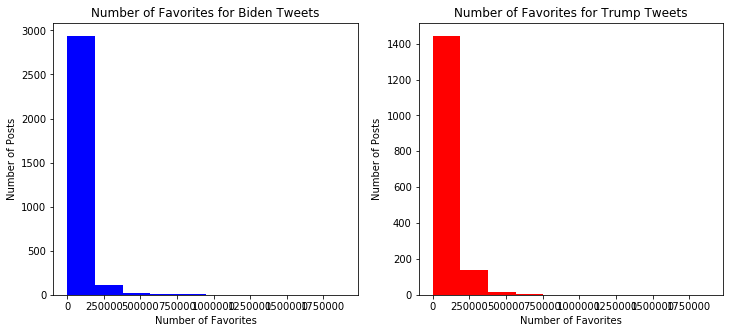

In [91]:
#Favorites <- only show the log scale, doesn't make sense to display this graph 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(biden['favourite'], color = "blue")
ax1.set_title("Number of Favorites for Biden Tweets")
ax1.set_xlabel("Number of Favorites")
ax1.set_ylabel("Number of Posts")

ax2.hist(trump['favourite'], color = "red")
ax2.set_title("Number of Favorites for Trump Tweets")
ax2.set_xlabel("Number of Favorites")
ax2.set_ylabel("Number of Posts")

plt.show()

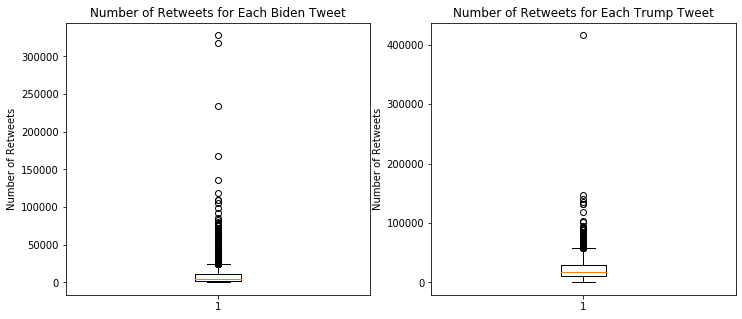

In [92]:
# Retweets 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.boxplot(biden['retweets'])
ax1.set_title("Number of Retweets for Each Biden Tweet")
ax1.set_ylabel("Number of Retweets")

ax2.boxplot(trump['retweets'])
ax2.set_title("Number of Retweets for Each Trump Tweet")
ax2.set_ylabel("Number of Retweets")

plt.show()

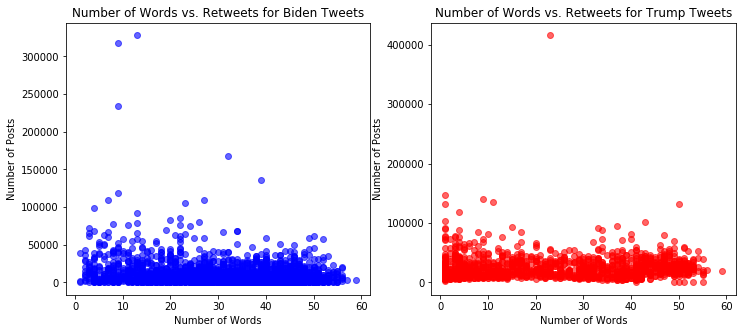

In [93]:
# Number of Words vs. Retweets 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(x = biden['tweet_length'], y = biden['retweets'], alpha = 0.6, color="blue")
ax1.set_title("Number of Words vs. Retweets for Biden Tweets")
ax1.set_xlabel("Number of Words")
ax1.set_ylabel("Number of Posts")

ax2.scatter(x = trump['tweet_length'], y = trump['retweets'], alpha = 0.6, color="red")
ax2.set_title("Number of Words vs. Retweets for Trump Tweets")
ax2.set_xlabel("Number of Words")
ax2.set_ylabel("Number of Posts")

plt.show()

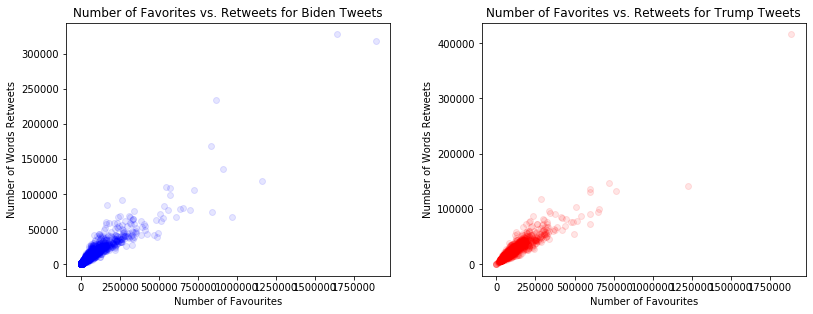

In [94]:
# Number of Favorites vs. Retweets <- non-log version

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(x = 'favourite', y = 'retweets', data = biden, alpha = 0.1, color="blue")
ax1.set_title("Number of Favorites vs. Retweets for Biden Tweets")
ax1.set_xlabel("Number of Favourites")
ax1.set_ylabel("Number of Words Retweets")

ax2.scatter(x = 'favourite', y = 'retweets', data = trump, alpha = 0.1, color="red")
ax2.set_title("Number of Favorites vs. Retweets for Trump Tweets")
ax2.set_xlabel("Number of Favourites")
ax2.set_ylabel("Number of Words Retweets")

fig.tight_layout(pad=3.0)
plt.show()

## Exploratory Data Analysis for Cluster Analysis:

Biden: 
evening      1343
night        1196
afternoon     518
morning        27
Name: time_of_day, dtype: int64


Trump: 
night        555
evening      476
afternoon    409
morning      167
Name: time_of_day, dtype: int64


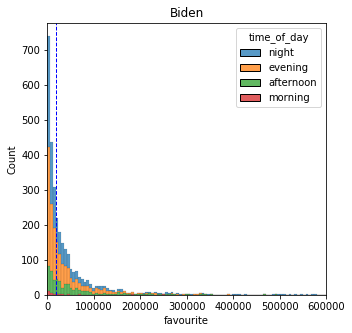

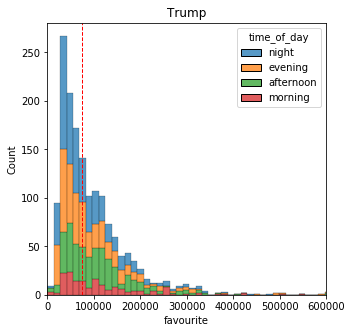

In [95]:
print("Biden: ")
print(biden.time_of_day.value_counts()) 
print('\n')
print("Trump: ")
print(trump.time_of_day.value_counts())

# blue dashed line = biden median value for favorites recieved 
# red dashed line = trump median value for favorites recieved 
plt.figure(figsize = (5,5))
sns.histplot(x="favourite", hue="time_of_day", multiple = "stack", data = biden)
plt.xlim(left = 0, right = 600000)
plt.title("Biden")
plt.axvline(biden['favourite'].median(), color='blue', linestyle='dashed', linewidth=1)

plt.figure(figsize = (5,5))
sns.histplot(x="favourite", hue="time_of_day", multiple = "stack", data = trump)
plt.xlim(left = 0, right = 600000)
plt.title("Trump")
plt.axvline(trump['favourite'].median(), color='red', linestyle='dashed', linewidth=1)

plt.show()

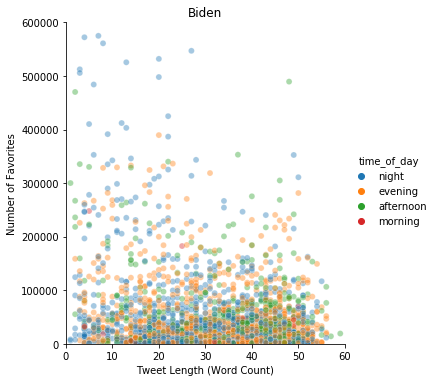

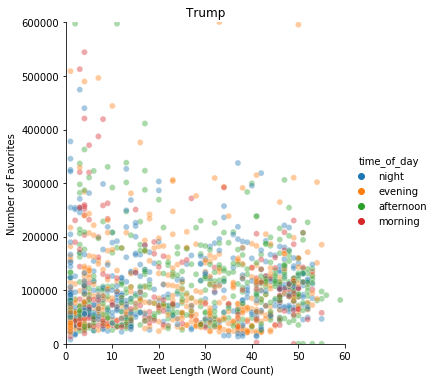

In [96]:
# does not seem to be a relationship between tweet length and number of favorites recieved 
# trump has many tweets that are a single hyperlink to another tweet, which is why he has many tweets of length = 1
sns.relplot(x = "tweet_length", y = "favourite", hue = "time_of_day", alpha = 0.4, data = biden)
plt.xlabel("Tweet Length (Word Count)")
plt.ylabel("Number of Favorites")
plt.title("Biden")
plt.xlim(left = 0, right = 60)
plt.ylim(bottom = 0, top = 600000)

sns.relplot(x = "tweet_length", y = "favourite", hue = "time_of_day", alpha = 0.4, data = trump)
plt.xlabel("Tweet Length (Word Count)")
plt.ylabel("Number of Favorites")
plt.title("Trump")
plt.xlim(left = 0, right = 60)
plt.ylim(bottom = 0, top = 600000)
plt.show()

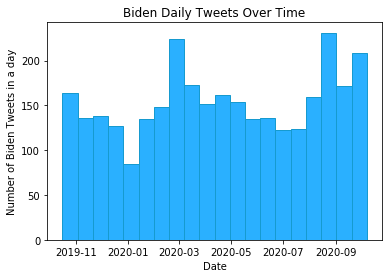

In [97]:
# Biden Tweets per day

plt.hist(biden['date'], facecolor = '#2ab0ff', edgecolor='#169acf', bins = 20)
plt.xlabel('Date')
plt.ylabel('Number of Biden Tweets in a day')
plt.title("Biden Daily Tweets Over Time")

plt.show()